In [8]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt

# plotting
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn - sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from xgboost import XGBRegressor
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score,roc_auc_score, roc_curve, RocCurveDisplay
from numpy import mean
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import jaccard_score
from sklearn.decomposition import PCA 
# radiografia de nulos
import missingno as msno

import os
os.chdir(os.path.abspath(os.curdir))
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [9]:
os.listdir("../dados")

['nba_stats.csv', 'steroid_doping.csv']

In [10]:
nba_inicio = pd.read_csv("../dados/nba_stats.csv")

In [11]:
nba_inicio.rename(columns={
    'year': 'ano',
    'name': 'nome',
    'playerId': 'id_jogador',
    'playerSlug': 'slug_jogador',
    'positionId': 'id_posicao',
    'teamId': 'id_time',
    'status': 'status',
    'gamesPlayed': 'jogos_jogados',
    'avgMinutes': 'media_minutos',
    'avgFouls': 'media_faltas',
    'flagrantFouls': 'faltas_graves',
    'technicalFouls': 'faltas_tecnicas',
    'ejections': 'expulsoes',
    'doubleDouble': 'double_double',
    'tripleDouble': 'triple_double',
    'minutes': 'minutos',
    'rebounds': 'rebotes',
    'fouls': 'faltas',
    'avgRebounds': 'media_rebotes',
    'avgPoints': 'media_pontos',
    'avgFieldGoalsMade': 'media_cestas',
    'avgFieldGoalsAttempted': 'media_tentativas_cestas',
    'fieldGoalPct': 'pct_cestas',
    'avgThreePointFieldGoalsMade': 'media_cestas_3pontos',
    'avgThreePointFieldGoalsAttempted': 'media_tentativas_3pontos',
    'threePointFieldGoalPct': 'pct_3pontos',
    'avgFreeThrowsMade': 'media_lances_livres',
    'avgFreeThrowsAttempted': 'media_tentativas_lances_livres',
    'freeThrowPct': 'pct_lances_livres',
    'avgAssists': 'media_assistencias',
    'avgTurnovers': 'media_erro_passes',
    'points': 'pontos',
    'fieldGoalsMade': 'cestas_feitas',
    'fieldGoalsAttempted': 'tentativas_cestas',
    'threePointFieldGoalsMade': 'cestas_3pontos_feitas',
    'threePointFieldGoalsAttempted': 'tentativas_3pontos',
    'freeThrowsMade': 'lances_livres_feitos',
    'freeThrowsAttempted': 'tentativas_lances_livres',
    'assists': 'assistencias',
    'turnovers': 'erro_passes',
    'avgSteals': 'media_roubos',
    'avgBlocks': 'media_tocos',
    'steals': 'roubos',
    'blocks': 'tocos',
    'position': 'posicao',
    'birthdate': 'data_nascimento',
    'college': 'faculdade',
    'draftinfo': 'informacoes_draft',
    'birthplace': 'local_nascimento',
    'team': 'time',
    'htwt': 'altura_peso',
    'experience': 'experiencia',
    'rankingSalary': 'ranking_salario',
    'salary': 'salario'
}, inplace=True)

In [14]:
np.unique(nba_inicio.posicao)

array(['Center', 'Forward', 'Guard', 'Guard-Forward', 'Not Available',
       'Point Guard', 'Power Forward', 'Shooting Guard', 'Small Forward'],
      dtype=object)

## DataQuality, Cleasing and Transforming

### Conversao de peso e altura

In [8]:
import re
# Função para converter altura para metros
def convert_height_to_meters(height):
    if pd.notna(height):
        height = height.split(',')[0].strip()
        match = re.match(r"(\d+)' (\d+)\"", height)
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2))
            height_meters = (feet * 0.3048) + (inches * 0.0254)
            return round(height_meters, 2)
        return 0
    #else:
    #    return 0

# Função para converter peso para kg
def convert_weight_to_kg(weight):
    if pd.notna(weight):
        weight = weight.split(',')[1].strip()
        match = re.match(r"(\d+) lbs", weight)
        if match:
            pounds = int(match.group(1))
            weight_kg = pounds * 0.453592
            return round(weight_kg, 2)
        return 0
    #else:
    #    return 0

In [9]:
nba_inicio['altura'] = nba_inicio['altura_peso'].apply(lambda x: convert_height_to_meters(x))
nba_inicio['peso'] = nba_inicio['altura_peso'].apply(lambda x: convert_weight_to_kg(x))

In [10]:
nba_inicio['data_nascimento_'] = list(map(lambda x: x.split(" ")[0], nba_inicio['data_nascimento']))

In [11]:
nba_inicio['data_nascimento_'] = pd.to_datetime(nba_inicio['data_nascimento_'], format="%m/%d/%Y")

In [12]:
def calcular_idade(nasc):
    hoje = datetime.now()
    idade = ((hoje - nasc).days) // 365
    return idade 

nba_inicio['idade'] = nba_inicio['data_nascimento_'].apply(calcular_idade)

In [13]:
nba_inicio['idade_na_temporada'] = nba_inicio['ano'] - nba_inicio['data_nascimento_'].dt.year
nba_inicio['idade_completa'] = ((pd.to_datetime(nba_inicio['ano'].astype(str) + '-01-01') - nba_inicio['data_nascimento_']).dt.days // 365.25).astype(int)
nba_inicio['idade_na_temporada'] = nba_inicio['idade_na_temporada'] - nba_inicio['idade_completa']

#### Tratamento Salario

In [14]:
nba_inicio['salario_'] = nba_inicio['salario'].str.replace("$", "").str.replace(",", "").astype("float64")

In [15]:
nba_inicio[:5]

,ano,nome,id_jogador,slug_jogador,id_posicao,id_time,status,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,posicao,data_nascimento,faculdade,informacoes_draft,local_nascimento,time,altura_peso,experiencia,ranking_salario,salario,altura,peso,data_nascimento_,idade,idade_na_temporada,idade_completa,salario_
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000",NaN,NaN,1975-06-07,49,1,23,9000000.0
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000",NaN,NaN,1975-06-07,49,1,24,10125000.0
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000",NaN,NaN,1975-06-07,49,1,25,11250000.0
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000",NaN,NaN,1975-06-07,49,1,26,12375000.0
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000",NaN,NaN,1975-06-07,49,1,27,13500000.0


## Iniciando testes

In [16]:
# Quantidade de colunas (dimensionalidade alta)
len(nba_inicio.columns)

61

In [17]:
# Verificando as colunas e os valores que elas trazem
nba_inicio[:2]

,ano,nome,id_jogador,slug_jogador,id_posicao,id_time,status,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,posicao,data_nascimento,faculdade,informacoes_draft,local_nascimento,time,altura_peso,experiencia,ranking_salario,salario,altura,peso,data_nascimento_,idade,idade_na_temporada,idade_completa,salario_
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000",NaN,NaN,1975-06-07,49,1,23,9000000.0
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000",NaN,NaN,1975-06-07,49,1,24,10125000.0


#### Missing Detect and Treatment

<Axes: >

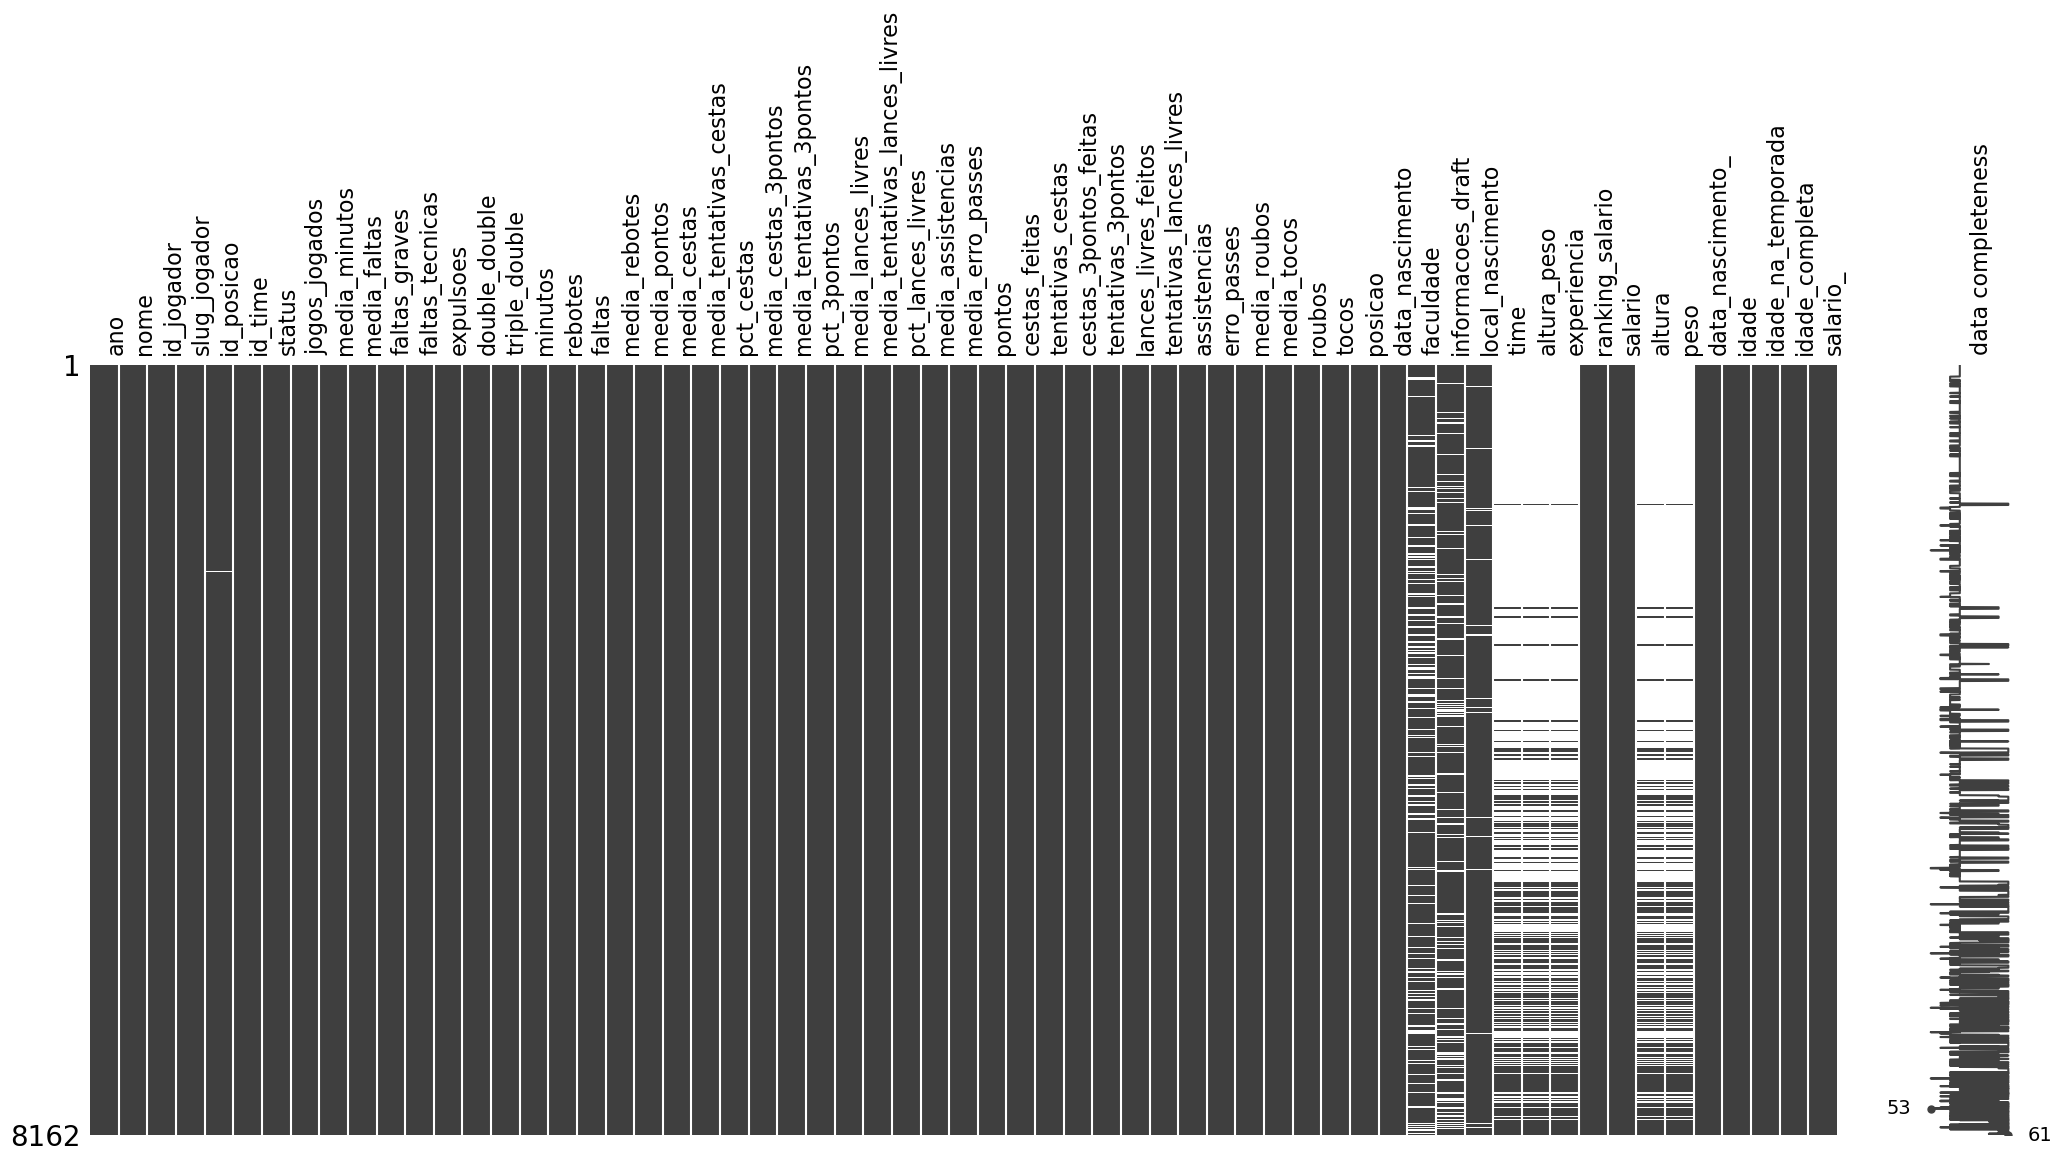

In [18]:
msno.matrix(nba_inicio,  labels=True, label_rotation=90)

#### DataType

In [19]:
nba = nba_inicio.copy()

In [20]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ano                             8162 non-null   int64         
 1   nome                            8162 non-null   object        
 2   id_jogador                      8162 non-null   int64         
 3   slug_jogador                    8162 non-null   object        
 4   id_posicao                      8156 non-null   object        
 5   id_time                         8162 non-null   object        
 6   status                          8162 non-null   object        
 7   jogos_jogados                   8162 non-null   float64       
 8   media_minutos                   8162 non-null   float64       
 9   media_faltas                    8162 non-null   float64       
 10  faltas_graves                   8162 non-null   float64       
 11  falt

#### Tratamento considerável para poucas linhas

OBS: Os nan para id_posicao eram muito poucos e apenas para 1 jogador em questao. Com isso, resolvi buscar pelo nome do jogador no Google e achei que ele sempre foi 'C', ou seja, Pivot.

In [46]:
#nba[nba['id_posicao'].isna()]['id_posicao'].fillna('C') # pivo
nba['id_posicao'] = nba['id_posicao'].fillna('C')

In [47]:
#nba_inicio.dropna(inplace=True)
set(nba.id_posicao)

{'C', 'F', 'G', 'GF', 'PF', 'PG', 'SF', 'SG'}

#### Funcao pra preencher Nulos com valores preditos

In [48]:
# Atualizar valores nulos na coluna 'peso' com 'peso_predito'
def preencher_valores_nulos_com_predito(df, coluna_, coluna_predito):
    indexes_nulos_ = df[df[coluna_].isna()].index
    for i in indexes_nulos_:
        df.at[i, coluna_] = df.at[i, coluna_predito]
    return df

## REGRESSAO LINEAR PARA PREVER ALTURA E PESO

#### Select KBest - selecao das melhores features via f_classif que usa ANOVA F-Score

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.preprocessing import LabelEncoder

In [50]:
#nba.to_csv('dataset_completo_01122024.csv')
nba = pd.read_csv('dataset_completo_01122024.csv')

In [51]:
features = [ 'id_posicao', 'jogos_jogados', 'media_minutos', 'media_faltas',
       'faltas_graves', 'faltas_tecnicas', 'expulsoes', 'double_double',
       'triple_double', 'minutos', 'rebotes', 'faltas', 'media_rebotes',
       'media_pontos', 'media_cestas', 'media_tentativas_cestas', 'pct_cestas',
       'media_cestas_3pontos', 'media_tentativas_3pontos', 'pct_3pontos',
       'media_lances_livres', 'media_tentativas_lances_livres',
       'pct_lances_livres', 'media_assistencias', 'media_erro_passes',
       'pontos', 'cestas_feitas', 'tentativas_cestas', 'cestas_3pontos_feitas',
       'tentativas_3pontos', 'lances_livres_feitos',
       'tentativas_lances_livres', 'assistencias', 'erro_passes',
       'media_roubos', 'media_tocos', 'roubos', 'tocos', 'ranking_salario', 
       'altura', 'peso', 'idade', 'idade_na_temporada',
       'idade_completa', 'salario_']

nba_clf = nba.loc[:, features]
nba_final__ = nba_clf.copy()
nba_clf_ = nba_clf.dropna()

label_encoder = LabelEncoder()
nba_clf_['id_posicao_encoded'] = label_encoder.fit_transform(nba_clf_['id_posicao'])

#### LR para altura

In [52]:
X_altura = nba_clf_.drop(columns=['id_posicao_encoded', 'id_posicao', 'altura'])
y_altura = nba_clf_['altura']

In [53]:
# Aplicar o SelectKBest com ANOVA F-score
k = 15 # Número de melhores features
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X_altura, y_altura)

In [54]:
# Recuperar os nomes das melhores features
selected_features = X_altura.columns[selector.get_support()].tolist()
print("Melhores features selecionadas:", selected_features)

Melhores features selecionadas: ['jogos_jogados', 'media_minutos', 'media_faltas', 'faltas_graves', 'faltas_tecnicas', 'expulsoes', 'double_double', 'triple_double', 'minutos', 'rebotes', 'faltas', 'media_rebotes', 'media_pontos', 'media_cestas', 'media_tentativas_cestas', 'pct_cestas', 'media_cestas_3pontos', 'media_tentativas_3pontos', 'pct_3pontos', 'media_lances_livres', 'media_tentativas_lances_livres', 'pct_lances_livres', 'media_assistencias', 'media_erro_passes', 'pontos', 'cestas_feitas', 'tentativas_cestas', 'cestas_3pontos_feitas', 'tentativas_3pontos', 'lances_livres_feitos', 'tentativas_lances_livres', 'assistencias', 'erro_passes', 'media_roubos', 'media_tocos', 'roubos', 'tocos', 'ranking_salario', 'peso', 'idade', 'idade_na_temporada', 'idade_completa', 'salario_']


In [55]:
selected_features.append('altura')

In [56]:
nba_clf_ = nba_clf_.loc[:, selected_features]

In [57]:
len(selected_features), nba_clf_.columns

(44,
 Index(['jogos_jogados', 'media_minutos', 'media_faltas', 'faltas_graves',
        'faltas_tecnicas', 'expulsoes', 'double_double', 'triple_double',
        'minutos', 'rebotes', 'faltas', 'media_rebotes', 'media_pontos',
        'media_cestas', 'media_tentativas_cestas', 'pct_cestas',
        'media_cestas_3pontos', 'media_tentativas_3pontos', 'pct_3pontos',
        'media_lances_livres', 'media_tentativas_lances_livres',
        'pct_lances_livres', 'media_assistencias', 'media_erro_passes',
        'pontos', 'cestas_feitas', 'tentativas_cestas', 'cestas_3pontos_feitas',
        'tentativas_3pontos', 'lances_livres_feitos',
        'tentativas_lances_livres', 'assistencias', 'erro_passes',
        'media_roubos', 'media_tocos', 'roubos', 'tocos', 'ranking_salario',
        'peso', 'idade', 'idade_na_temporada', 'idade_completa', 'salario_',
        'altura'],
       dtype='object'))

In [58]:
X_altura = nba_clf_.drop(columns=['altura'])
y_altura = nba_clf_.altura

#### Train Test Split

In [59]:
# Dividir em conjuntos de treino e teste
X_train_altura, X_test_altura, y_train_altura, y_test_altura = train_test_split(X_altura, y_altura, test_size=0.2, random_state=42)

#### KFolds

In [60]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#### Grid Search

In [36]:
# Definir os pipelines
pipelines = {
    'linear': Pipeline([('scaler', MinMaxScaler()), 
                        ('regressor', LinearRegression())]),
    
    'elastic_net': Pipeline([('scaler', MinMaxScaler()), 
                             ('regressor', ElasticNet())]),
    
    'xgboost': Pipeline([('scaler', MinMaxScaler()), 
                         ('regressor', XGBRegressor(objective='reg:squarederror'))]),
    
    'mlp': Pipeline([('scaler', MinMaxScaler()), 
                     ('regressor', MLPRegressor(max_iter=1000))]),
    
    'polynomial': Pipeline([('scaler', MinMaxScaler()), 
                            ('polynomial', PolynomialFeatures()), ('regressor', LinearRegression())])
}

In [37]:
# param Grids
# Definir os hiperparâmetros para o GridSearch
param_grid = {
    'linear': {
        'regressor__fit_intercept': [True, False]
    },
    'elastic_net': {
        'regressor__alpha': [0.1, 0.5, 1.0],
        'regressor__l1_ratio': [0.2, 0.5, 0.7, 1.0]
    },
    'xgboost': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.1, 0.2]
    },
    'mlp': {
        'regressor__hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'regressor__activation': ['relu', 'tanh'],
        'regressor__alpha': [0.0001, 0.001, 0.01]
    },
    'polynomial': {
        'polynomial__degree': [2, 3],
        'regressor__fit_intercept': [True, False]
    }   
}

In [38]:
# Realizar o GridSearchCV para cada pipeline
best_models = {}
for name, pipeline in pipelines.items():
    print(f"Rodando GridSearchCV para {name}...")
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=kf, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_altura, y_train_altura)
    best_models[name] = grid_search.best_estimator_
    print(f"Melhor modelo para {name}: {grid_search.best_params_}")
    print(f"R2 do melhor modelo para {name}: {grid_search.best_score_}\n")

Rodando GridSearchCV para linear...
Melhor modelo para linear: {'regressor__fit_intercept': True}
R2 do melhor modelo para linear: 0.7301593930776464

Rodando GridSearchCV para elastic_net...
Melhor modelo para elastic_net: {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.2}
R2 do melhor modelo para elastic_net: -0.006442439847689885

Rodando GridSearchCV para xgboost...
Melhor modelo para xgboost: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 300}
R2 do melhor modelo para xgboost: 0.8568629516233252

Rodando GridSearchCV para mlp...
Melhor modelo para mlp: {'regressor__activation': 'relu', 'regressor__alpha': 0.01, 'regressor__hidden_layer_sizes': (100, 50)}
R2 do melhor modelo para mlp: 0.6199623442080346

Rodando GridSearchCV para polynomial...
Melhor modelo para polynomial: {'polynomial__degree': 2, 'regressor__fit_intercept': True}
R2 do melhor modelo para polynomial: -1.0247077921626162



In [40]:
# Exibir os resultados do melhor modelo
for model_name, model in best_models.items():
    print(f"\nModelo: {model_name}")
    model.fit(X_train_altura, y_train_altura)
    y_pred_altura = model.predict(X_test_altura)
    rmse = np.sqrt(mean_squared_error(y_test_altura, y_pred_altura))
    r2 = r2_score(y_test_altura, y_pred_altura)
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")


Modelo: linear
RMSE: 0.04277053196947705
R-squared: 0.7374496979422467

Modelo: elastic_net
RMSE: 0.08376206850525718
R-squared: -0.006973417014430661

Modelo: xgboost
RMSE: 0.03088988361179584
R-squared: 0.8630519785165858

Modelo: mlp
RMSE: 0.04760392024179984
R-squared: 0.6747564773686419

Modelo: polynomial
RMSE: 0.08753380649447094
R-squared: -0.09970157637988719


#### Dados Altura

#### PreProcessing

In [61]:
scaler = MinMaxScaler()
X_scaled_altura = scaler.fit_transform(X_train_altura)

#### Learning Curve

In [62]:
# MELHOR MODELO GRIDSEARCH
# xgboost: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 300}
xgb_model_altura = XGBRegressor(objective='reg:squarederror', n_estimators=500, random_state=42, n_jobs=-1, max_depth=7, learning_rate=0.01,
                        gamma=1.0, reg_alpha=0.5, reg_lambda=2.5, subsample=0.3, colsample_bytree=0.3)

In [43]:
# Plotar a curva de aprendizado para o modelo XGBoost
train_sizes_altura, train_scores_altura, test_scores_altura = learning_curve(xgb_model_altura, 
                                                        X_scaled_altura, y_train_altura, 
                                                        cv=5, 
                                                        scoring='neg_mean_absolute_error', #neg_mean_squared_error
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        random_state=42
                                                       )

train_rmse_altura = np.sqrt(-train_scores_altura)
test_rmse_altura = np.sqrt(-test_scores_altura)

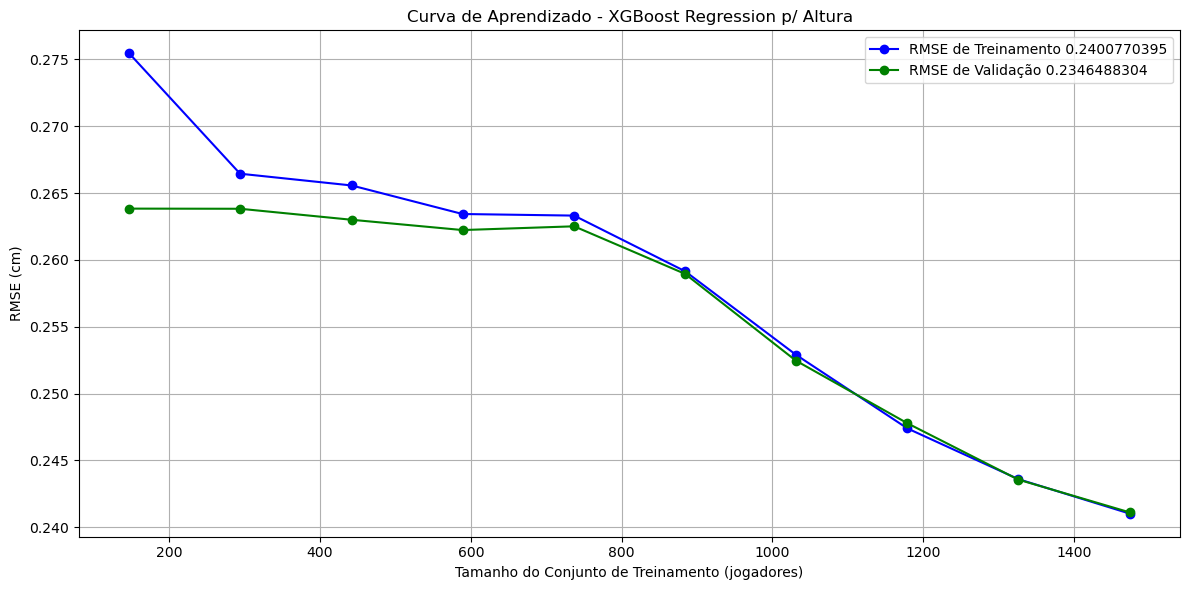

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(train_sizes_altura, train_rmse_altura.mean(axis=1) , 'o-', 
         color='blue', label=f'RMSE de Treinamento {round(np.min(train_rmse_altura), 10)}')
plt.plot(train_sizes_altura, test_rmse_altura.mean(axis=1) , 'o-', 
         color='green', label=f'RMSE de Validação {round(np.min(test_rmse_altura),10)}')
plt.xlabel('Tamanho do Conjunto de Treinamento (jogadores)')
plt.ylabel('RMSE (cm)')
plt.title('Curva de Aprendizado - XGBoost Regression p/ Altura')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Fit on model

In [100]:
xgb_model_altura.fit(X_scaled_altura, y_train_altura)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

#### Save Model

In [101]:
xgb_loaded_altura.save_model('XGBboost_altura.json')

#### Loading Model

In [63]:
# salvando o modelo ajustado
xgb_loaded_altura = XGBRegressor()
xgb_loaded_altura.load_model('XGBboost_altura.json')

#### FullFilment para Altura - FF

In [64]:
nba_clf_completo = nba_clf.loc[:, selected_features]
X_altura = nba_clf_completo.drop(columns=['altura'])
y_altura = nba_clf_completo.altura

In [65]:
scaler = MinMaxScaler()
X_scaled_altura_ff = scaler.fit_transform(X_altura)
np.shape(X_scaled_altura_ff), np.shape(y_altura)

((8162, 43), (8162,))

In [66]:
nba_clf_completo['altura_predita'] = xgb_loaded_altura.predict(X_scaled_altura_ff)
altura_predita = nba_clf_completo['altura_predita'].round(2)

In [67]:
altura_predita

0       2.03
1       2.03
2       2.03
3       2.03
4       2.03
        ... 
8157    1.96
8158    1.98
8159    1.96
8160    1.95
8161    1.99
Name: altura_predita, Length: 8162, dtype: float32

In [68]:
nba_final__['altura_predita'] = altura_predita

In [69]:
np.shape(nba_final__['altura_predita'])

(8162,)

In [70]:
preencher_valores_nulos_com_predito(nba_final__, "altura", "altura_predita")

,id_posicao,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,ranking_salario,altura,peso,idade,idade_na_temporada,idade_completa,salario_,altura_predita
0,SG,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,15,2.03,NaN,49,1,23,9000000.0,2.03
1,SG,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,27,2.03,NaN,49,1,24,10125000.0,2.03
2,SG,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,17,2.03,NaN,49,1,25,11250000.0,2.03
3,SG,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,14,2.03,NaN,49,1,26,12375000.0,2.03
4,SG,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,11,2.03,NaN,49,1,27,13500000.0,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,F,23.0,8.086957,0.608696,0.0,0.0,0.0,0.0,0.0,186.0,37.0,14.0,1.608696,3.260870,1.260870,2.565218,49.153000,0.260870,0.608696,42.857143,0.478261,0.869565,55.000000,0.478261,0.347826,75.0,29.0,59.0,6.0,14.0,11.0,20.0,11.0,8.0,0.086957,0.478261,2.0,11.0,277,2.03,90.72,22,1,20,2303520.0,1.96
8158,F,15.0,6.400000,0.666667,0.0,0.0,0.0,1.0,0.0,96.0,25.0,10.0,1.666667,3.066667,1.200000,2.400000,50.000000,0.133333,0.400000,33.333334,0.533333,0.533333,100.000000,0.333333,0.200000,46.0,18.0,36.0,2.0,6.0,8.0,8.0,5.0,3.0,0.266667,0.400000,4.0,6.0,332,2.03,92.99,22,1,20,1719864.0,1.98
8159,F,38.0,5.631579,0.631579,0.0,0.0,0.0,0.0,0.0,214.0,37.0,24.0,0.973684,2.236842,0.842105,1.894737,44.444000,0.184211,0.710526,25.925925,0.368421,0.552632,66.667000,0.578947,0.210526,85.0,32.0,72.0,7.0,27.0,14.0,21.0,22.0,8.0,0.289474,0.131579,11.0,5.0,238,2.01,90.72,22,1,20,3350760.0,1.96
8160,G,12.0,5.166666,0.833333,0.0,0.0,0.0,0.0,0.0,62.0,12.0,10.0,1.000000,1.916667,0.583333,1.666667,35.000000,0.250000,0.750000,33.333334,0.500000,0.500000,100.000000,0.500000,1.333333,23.0,7.0,20.0,3.0,9.0,6.0,6.0,6.0,16.0,0.083333,0.083333,1.0,1.0,334,1.91,81.65,22,1,20,1719864.0,1.95


#### LR para peso

In [71]:
nba_clf_ = nba.loc[:, features]
nba_final__peso = nba_clf_.copy()
nba_clf_ = nba_clf_.dropna()
label_encoder = LabelEncoder()
nba_clf_['id_posicao_encoded'] = label_encoder.fit_transform(nba_clf_['id_posicao'])

In [72]:
X_peso = nba_clf_.drop(columns=['id_posicao_encoded', 'id_posicao', 'peso'])
y_peso = nba_clf_['peso']

In [73]:
# Aplicar o SelectKBest com ANOVA F-score
k = 35 # Número de melhores features
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_peso, y_peso)

In [74]:
# Recuperar os nomes das melhores features
selected_features = X_peso.columns[selector.get_support()].tolist()
print("Melhores features selecionadas:", selected_features)

Melhores features selecionadas: ['jogos_jogados', 'media_faltas', 'faltas_graves', 'faltas_tecnicas', 'expulsoes', 'double_double', 'rebotes', 'faltas', 'media_rebotes', 'media_cestas', 'media_tentativas_cestas', 'pct_cestas', 'media_cestas_3pontos', 'media_tentativas_3pontos', 'pct_3pontos', 'media_lances_livres', 'media_tentativas_lances_livres', 'pct_lances_livres', 'media_assistencias', 'cestas_feitas', 'tentativas_cestas', 'cestas_3pontos_feitas', 'tentativas_3pontos', 'lances_livres_feitos', 'tentativas_lances_livres', 'assistencias', 'media_roubos', 'media_tocos', 'roubos', 'tocos', 'ranking_salario', 'altura', 'idade', 'idade_completa', 'salario_']


In [75]:
selected_features.append('peso')

In [76]:
nba_clf_ = nba_clf_.loc[:, selected_features]

In [77]:
len(selected_features), nba_clf_.columns

(36,
 Index(['jogos_jogados', 'media_faltas', 'faltas_graves', 'faltas_tecnicas',
        'expulsoes', 'double_double', 'rebotes', 'faltas', 'media_rebotes',
        'media_cestas', 'media_tentativas_cestas', 'pct_cestas',
        'media_cestas_3pontos', 'media_tentativas_3pontos', 'pct_3pontos',
        'media_lances_livres', 'media_tentativas_lances_livres',
        'pct_lances_livres', 'media_assistencias', 'cestas_feitas',
        'tentativas_cestas', 'cestas_3pontos_feitas', 'tentativas_3pontos',
        'lances_livres_feitos', 'tentativas_lances_livres', 'assistencias',
        'media_roubos', 'media_tocos', 'roubos', 'tocos', 'ranking_salario',
        'altura', 'idade', 'idade_completa', 'salario_', 'peso'],
       dtype='object'))

In [78]:
X_peso = nba_clf_.drop(columns=['peso'])
y_peso = nba_clf_.peso

#### Train Test Split

In [79]:
# Dividir em conjuntos de treino e teste
X_train_peso, X_test_peso, y_train_peso, y_test_peso = train_test_split(X_peso, y_peso, test_size=0.2, random_state=42)

#### KFolds

In [80]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#### Grid Search

In [1344]:
# Definir os pipelines
pipelines = {
    'linear': Pipeline([('scaler', MinMaxScaler()), 
                        ('regressor', LinearRegression())]),
    
    'elastic_net': Pipeline([('scaler', MinMaxScaler()), 
                             ('regressor', ElasticNet())]),
    
    'xgboost': Pipeline([('scaler', MinMaxScaler()), 
                         ('regressor', XGBRegressor(objective='reg:squarederror'))]),
    
    'mlp': Pipeline([('scaler', MinMaxScaler()), 
                     ('regressor', MLPRegressor(max_iter=1000))]),
    
    'polynomial': Pipeline([('scaler', MinMaxScaler()), 
                            ('polynomial', PolynomialFeatures()), ('regressor', LinearRegression())])
}

In [1345]:
# param Grids
# Definir os hiperparâmetros para o GridSearch
param_grid = {
    'linear': {
        'regressor__fit_intercept': [True, False]
    },
    'elastic_net': {
        'regressor__alpha': [0.1, 0.5, 1.0],
        'regressor__l1_ratio': [0.2, 0.5, 0.7, 1.0]
    },
    'xgboost': {
        'regressor__n_estimators': [100, 200, 300],  # Aumentar número de estimadores
        'regressor__max_depth': [3, 5, 7],            # Testar profundidades mais altas
        'regressor__learning_rate': [0.01, 0.05, 0.1], # Valores mais finos para learning_rate
        #'regressor__subsample': [0.8, 0.9, 1.0],           # Adicionar subsample
        #'regressor__colsample_bytree': [0.8, 0.9, 1.0],    # Adicionar colsample_bytree
        'regressor__gamma': [0, 0.1, 0.2, 0.3],            # Regularização com gamma
        #'regressor__reg_alpha': [0, 0.01, 0.1],            # L1 regularization (alpha)
        #'regressor__reg_lambda': [1, 1.5, 2],              # L2 regularization (lambda)
    },
    'mlp': {
        'regressor__hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'regressor__activation': ['relu', 'tanh'],
        'regressor__alpha': [0.0001, 0.001, 0.01]
    },
    'polynomial': {
        'polynomial__degree': [2, 3],
        'regressor__fit_intercept': [True, False]
    }   
}

In [1346]:
# Realizar o GridSearchCV para cada pipeline
best_models = {}
for name, pipeline in pipelines.items():
    print(f"Rodando GridSearchCV para {name}...")
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=kf, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_peso, y_train_peso)
    best_models[name] = grid_search.best_estimator_
    print(f"Melhor modelo para {name}: {grid_search.best_params_}")
    print(f"RMSE do melhor modelo para {name}: {grid_search.best_score_}\n")

Rodando GridSearchCV para linear...
Melhor modelo para linear: {'regressor__fit_intercept': True}
RMSE do melhor modelo para linear: 0.7085598810048673

Rodando GridSearchCV para elastic_net...
Melhor modelo para elastic_net: {'regressor__alpha': 0.1, 'regressor__l1_ratio': 1.0}
RMSE do melhor modelo para elastic_net: 0.7000810970034961

Rodando GridSearchCV para xgboost...
Melhor modelo para xgboost: {'regressor__gamma': 0.3, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 7, 'regressor__n_estimators': 300}
RMSE do melhor modelo para xgboost: 0.8297291021995461

Rodando GridSearchCV para mlp...
Melhor modelo para mlp: {'regressor__activation': 'relu', 'regressor__alpha': 0.01, 'regressor__hidden_layer_sizes': (100, 50)}
RMSE do melhor modelo para mlp: 0.723939585976764

Rodando GridSearchCV para polynomial...
Melhor modelo para polynomial: {'polynomial__degree': 2, 'regressor__fit_intercept': True}
RMSE do melhor modelo para polynomial: 0.15135573817258005



In [1354]:
# Exibir os resultados do melhor modelo
for model_name, model in best_models.items():
    print(f"\nModelo: {model_name}")
    model.fit(X_train_peso, y_train_peso)
    y_pred_peso = model.predict(X_test_peso)
    rmse = np.sqrt(mean_squared_error(y_test_peso, y_pred_peso))
    r2 = r2_score(y_test_peso, y_pred_peso)
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")


Modelo: linear
RMSE: 5.897851588369156
R-squared: 0.7376659313661118

Modelo: elastic_net
RMSE: 6.1405486710761465
R-squared: 0.7156315759671722

Modelo: xgboost
RMSE: 4.126032313813588
R-squared: 0.8716096848350025

Modelo: mlp
RMSE: 5.947019629237848
R-squared: 0.7332737500287256

Modelo: polynomial
RMSE: 8.247811501684984
R-squared: 0.48696798333863456


#### Dados

#### PreProcessing

In [54]:
scaler = MinMaxScaler()
X_scaled_peso = scaler.fit_transform(X_train_peso)

In [55]:
np.shape(X_scaled_peso)

(1843, 35)

#### Learning Curve

        'regressor__n_estimators': [100, 200, 300],  # Aumentar número de estimadores
        'regressor__max_depth': [3, 5, 7],            # Testar profundidades mais altas
        'regressor__learning_rate': [0.01, 0.05, 0.1], # Valores mais finos para learning_rate
        #'regressor__subsample': [0.8, 0.9, 1.0],           # Adicionar subsample
        #'regressor__colsample_bytree': [0.8, 0.9, 1.0],    # Adicionar colsample_bytree
        'regressor__gamma': [0, 0.1, 0.2, 0.3],            # Regularização com gamma
        #'regressor__reg_alpha': [0, 0.01, 0.1],            # L1 regularization (alpha)
        #'regressor__reg_lambda': [1, 1.5, 2],              # L2 regularization (lambda)

In [56]:
# MELHOR MODELO GRIDSEARCH
# Rodando GridSearchCV para xgboost...
# Melhor modelo para xgboost: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 7, 'regressor__n_estimators': 300}
# R2 do melhor modelo para xgboost: -0.031717018558921735
xgb_model_peso = XGBRegressor(objective='reg:squarederror', n_estimators=500, random_state=42, n_jobs=10, max_depth=3, learning_rate=0.009, 
                         gamma=1.0, reg_alpha=5.5, reg_lambda=7.5, subsample=.3, colsample_bytree=.3)

In [60]:
# Plotar a curva de aprendizado para o modelo XGBoost
train_sizes_peso, train_scores_peso, test_scores_peso = learning_curve(xgb_model_peso, 
                                                        X_scaled_peso, y_train_peso, 
                                                        cv=5, 
                                                        scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        random_state=42, #verbose=2
                                                       )

train_rmse_peso = np.sqrt(-train_scores_peso)
test_rmse_peso = np.sqrt(-test_scores_peso)

In [61]:
print(round(np.min(train_rmse_peso), 10), round(np.min(test_rmse_peso),10))

5.3096522038 5.7183541922


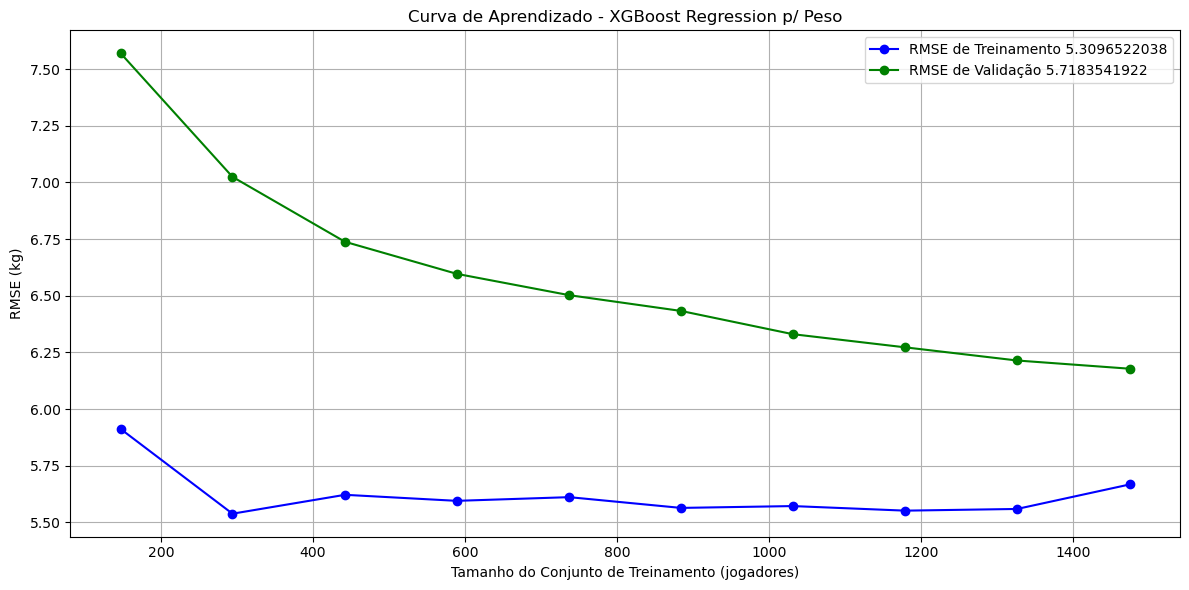

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(train_sizes_peso, train_rmse_peso.mean(axis=1) , 'o-', color='blue', label=f'RMSE de Treinamento {round(np.min(train_rmse_peso), 10)}')
plt.plot(train_sizes_peso, test_rmse_peso.mean(axis=1) , 'o-', color='green', label=f'RMSE de Validação {round(np.min(test_rmse_peso),10)}')
plt.xlabel('Tamanho do Conjunto de Treinamento (jogadores)')
plt.ylabel('RMSE (kg)')
plt.title('Curva de Aprendizado - XGBoost Regression p/ Peso')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Fit on model

In [1355]:
xgb_model_peso.fit(X_scaled_peso, y_train_peso)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.009, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=10,
             num_parallel_tree=None, random_state=42, ...)

#### Save Model

In [1356]:
xgb_model_peso.save_model('XGBboost_peso.json')

#### Loading Model

In [85]:
# salvando o modelo ajustado
xgb_loaded_peso = XGBRegressor()
xgb_loaded_peso.load_model('XGBboost_peso.json')

#### FullFilment para Peso - FF

In [86]:
nba_clf_completo = nba_clf.loc[:, selected_features]
X_peso = nba_clf_completo.drop(columns=['peso'])
y_peso = nba_clf_completo.peso

In [87]:
scaler = MinMaxScaler()
X_scaled_peso_ff = scaler.fit_transform(X_peso)
np.shape(X_scaled_peso_ff), len(y_peso)

((8162, 35), 8162)

In [88]:
peso_predito = xgb_loaded_peso.predict(X_scaled_peso_ff)
nba_final__["peso_predito"] = peso_predito

In [89]:
preencher_valores_nulos_com_predito(nba_final__, "peso", "peso_predito")

,id_posicao,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,ranking_salario,altura,peso,idade,idade_na_temporada,idade_completa,salario_,altura_predita,peso_predito
0,SG,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,15,2.03,102.322075,49,1,23,9000000.0,2.03,102.322075
1,SG,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,27,2.03,101.694366,49,1,24,10125000.0,2.03,101.694366
2,SG,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,17,2.03,102.576622,49,1,25,11250000.0,2.03,102.576622
3,SG,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,14,2.03,101.864983,49,1,26,12375000.0,2.03,101.864983
4,SG,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,11,2.03,102.447159,49,1,27,13500000.0,2.03,102.447159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,F,23.0,8.086957,0.608696,0.0,0.0,0.0,0.0,0.0,186.0,37.0,14.0,1.608696,3.260870,1.260870,2.565218,49.153000,0.260870,0.608696,42.857143,0.478261,0.869565,55.000000,0.478261,0.347826,75.0,29.0,59.0,6.0,14.0,11.0,20.0,11.0,8.0,0.086957,0.478261,2.0,11.0,277,2.03,90.720000,22,1,20,2303520.0,1.96,99.585518
8158,F,15.0,6.400000,0.666667,0.0,0.0,0.0,1.0,0.0,96.0,25.0,10.0,1.666667,3.066667,1.200000,2.400000,50.000000,0.133333,0.400000,33.333334,0.533333,0.533333,100.000000,0.333333,0.200000,46.0,18.0,36.0,2.0,6.0,8.0,8.0,5.0,3.0,0.266667,0.400000,4.0,6.0,332,2.03,92.990000,22,1,20,1719864.0,1.98,100.375076
8159,F,38.0,5.631579,0.631579,0.0,0.0,0.0,0.0,0.0,214.0,37.0,24.0,0.973684,2.236842,0.842105,1.894737,44.444000,0.184211,0.710526,25.925925,0.368421,0.552632,66.667000,0.578947,0.210526,85.0,32.0,72.0,7.0,27.0,14.0,21.0,22.0,8.0,0.289474,0.131579,11.0,5.0,238,2.01,90.720000,22,1,20,3350760.0,1.96,96.633217
8160,G,12.0,5.166666,0.833333,0.0,0.0,0.0,0.0,0.0,62.0,12.0,10.0,1.000000,1.916667,0.583333,1.666667,35.000000,0.250000,0.750000,33.333334,0.500000,0.500000,100.000000,0.500000,1.333333,23.0,7.0,20.0,3.0,9.0,6.0,6.0,6.0,16.0,0.083333,0.083333,1.0,1.0,334,1.91,81.650000,22,1,20,1719864.0,1.95,91.020782


#### Resultados da Regressao Linear para Altura e Peso

In [90]:
from scipy.stats import shapiro, levene
# Testar confiabilidade entre altura e peso originais vs preditos
def testar_confianca_filtro(df_original, df_predito, coluna_original, coluna_predita):
    # Filtrar apenas os índices onde os originais não são NaN
    #indices_validos = df_original[~df_original[coluna_original].isna()].index
    indices_validos = df_original[coluna_original].index
    originais = df_predito.loc[indices_validos, coluna_original]
    preditos = df_predito.loc[indices_validos, coluna_predita]
    print(len(originais),len(preditos))
    # Teste de Shapiro-Wilk
    shapiro_original = shapiro(originais)
    shapiro_predito = shapiro(preditos)

    # Teste de Levene para igualdade de variâncias
    levene_test = levene(originais, preditos)

    print(f"\nAnálise para {coluna_original} e {coluna_predita} (Índices válidos):")
    print(f"Shapiro-Wilk Original: Estatística={shapiro_original.statistic:.7f}, p-valor={shapiro_original.pvalue:.7f}")
    print(f"Shapiro-Wilk Predito: Estatística={shapiro_predito.statistic:.7f}, p-valor={shapiro_predito.pvalue:.7f}")
    print(f"Levene Test: Estatística={levene_test.statistic:.7f}, p-valor={levene_test.pvalue:.7f}")

    return indices_validos, originais, preditos

# Testar confiabilidade apenas nos índices válidos
print("\nTeste de Confiabilidade para Altura (Apenas índices válidos)")
indices_validos, originais, preditos = testar_confianca_filtro(nba, nba_final__, 'altura', 'altura_predita')

print("\nTeste de Confiabilidade para Peso (Apenas índices válidos)")
indices_validos, originais, preditos = testar_confianca_filtro(nba, nba_final__, 'peso', 'peso_predito')


Teste de Confiabilidade para Altura (Apenas índices válidos)
8162 8162

Análise para altura e altura_predita (Índices válidos):
Shapiro-Wilk Original: Estatística=0.7123513, p-valor=0.0000000
Shapiro-Wilk Predito: Estatística=0.6727002, p-valor=0.0000000
Levene Test: Estatística=270.8339729, p-valor=0.0000000

Teste de Confiabilidade para Peso (Apenas índices válidos)
8162 8162

Análise para peso e peso_predito (Índices válidos):
Shapiro-Wilk Original: Estatística=0.9662697, p-valor=0.0000000
Shapiro-Wilk Predito: Estatística=0.9758328, p-valor=0.0000000
Levene Test: Estatística=27.3723954, p-valor=0.0000002


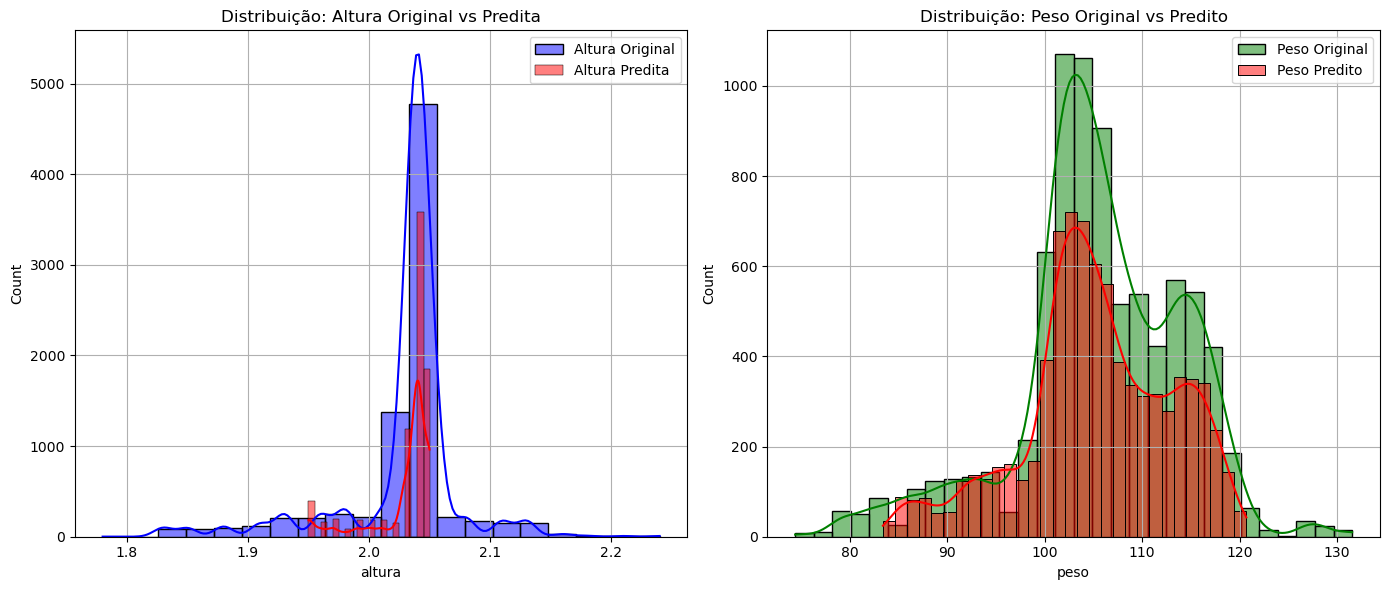

In [91]:
# Plotando Histogramas para Comparação
plt.figure(figsize=(14, 6))

# Altura
plt.subplot(1, 2, 1)
sns.histplot(nba_final__.loc[indices_validos, 'altura'], kde=True, color='blue', label='Altura Original', bins=20)
sns.histplot(nba_final__.loc[indices_validos, 'altura_predita'], kde=True, color='red', label='Altura Predita', bins=20)
plt.title("Distribuição: Altura Original vs Predita")
plt.legend()
plt.grid(True)

# Peso
plt.subplot(1, 2, 2)
sns.histplot(nba_final__.loc[indices_validos, 'peso'], kde=True, color='green', label='Peso Original', bins=30)
sns.histplot(nba_final__.loc[indices_validos, 'peso_predito'], kde=True, color='red', label='Peso Predito', bins=30)
plt.title("Distribuição: Peso Original vs Predito")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Classificacao Projeto III

In [92]:
nba_final__['id_jogador'] = nba.id_jogador

In [93]:
features = ['id_jogador', 'id_posicao', 'jogos_jogados', 'media_minutos', 'media_faltas',
       'faltas_graves', 'faltas_tecnicas', 'expulsoes', 'double_double',
       'triple_double', 'minutos', 'rebotes', 'faltas', 'media_rebotes',
       'media_pontos', 'media_cestas', 'media_tentativas_cestas',
       'pct_cestas', 'media_cestas_3pontos', 'media_tentativas_3pontos',
       'pct_3pontos', 'media_lances_livres',
       'media_tentativas_lances_livres', 'pct_lances_livres',
       'media_assistencias', 'media_erro_passes', 'pontos',
       'cestas_feitas', 'tentativas_cestas', 'cestas_3pontos_feitas',
       'tentativas_3pontos', 'lances_livres_feitos',
       'tentativas_lances_livres', 'assistencias', 'erro_passes',
       'media_roubos', 'media_tocos', 'roubos', 'tocos',
       'ranking_salario', 'idade', 'idade_na_temporada',
       'idade_completa', 'salario_', 'altura','peso']
df_nba = nba_final__.loc[:, features]

#### Final de tratamento de dados

In [142]:
df_nba = df_nba.reset_index(level=0, drop=True)

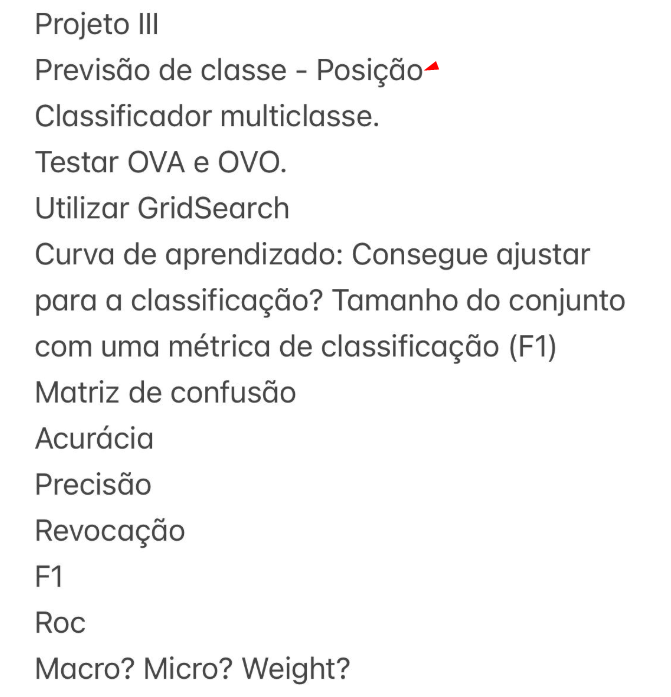

In [143]:
df_nba.sample(5)

,id_jogador,id_posicao,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,ranking_salario,idade,idade_na_temporada,idade_completa,salario_,altura,peso,taxa_faltas,proporcao_faltas,rebotes_por_minuto,tocos_roubos_por_minuto,impacto_defensivo,pontos_por_minuto,eficiencia_3pontos,eficiencia_lances_livres,contribuicao_ofensiva,prop_tentativas_3pontos
5527,6461,PF,81.0,26.580246,2.864197,0.0,12.0,1.0,11.0,0.0,2153.0,485.0,232.0,5.987654,13.765432,5.074074,10.432098,48.639000,0.419753,1.333333,31.481481,3.197531,4.037037,79.205002,1.777778,1.814815,1115.0,411.0,845.0,34.0,108.0,259.0,327.0,144.0,147.0,0.839506,0.629630,68.0,51.0,218,35,1,24,2989239.0,2.06,111.130000,1.939619,0.0,0.225267,0.055272,0.248955,0.517882,13.214448,253.260425,0.584765,0.127811
2567,1966,SF,80.0,42.350000,1.825000,0.0,4.0,0.0,25.0,4.0,3388.0,588.0,146.0,7.350000,27.187500,9.937500,21.050000,47.209000,1.350000,3.850000,35.064936,5.962500,7.950000,75.000000,7.212500,3.275000,2175.0,795.0,1684.0,108.0,308.0,477.0,636.0,577.0,262.0,2.212500,0.650000,177.0,52.0,137,39,1,20,4621800.0,2.06,113.400000,0.258560,0.0,0.173554,0.067591,0.188902,0.641972,47.337663,447.187500,0.812279,0.182898
7765,3134932,SG,19.0,9.526316,0.368421,0.0,0.0,0.0,0.0,0.0,181.0,47.0,7.0,2.473684,2.842105,1.263158,1.947368,64.864998,0.263158,0.526316,50.000000,0.052632,0.105263,50.000000,1.157895,0.368421,54.0,24.0,37.0,5.0,10.0,1.0,2.0,22.0,7.0,0.368421,0.157895,7.0,3.0,331,28,1,23,2100000.0,1.96,95.250000,0.000000,0.0,0.259669,0.055249,0.276243,0.298343,13.157895,2.631579,0.419890,0.270270
4537,3466,SG,56.0,20.839285,1.446428,0.0,0.0,0.0,0.0,0.0,1167.0,130.0,81.0,2.321429,5.339286,2.017857,4.392857,45.935001,0.571429,1.660714,34.408602,0.732143,1.035714,70.690002,1.803572,1.232143,299.0,113.0,246.0,32.0,93.0,41.0,58.0,101.0,69.0,0.839286,0.446429,47.0,25.0,347,38,1,22,870968.0,2.04,103.393974,0.000000,0.0,0.111397,0.061697,0.132819,0.256213,19.662059,51.755181,0.342759,0.378049
1025,91,PF,79.0,39.227848,2.873418,0.0,0.0,0.0,45.0,0.0,3099.0,790.0,227.0,10.000000,24.721520,9.569620,18.164557,52.682999,0.012658,0.037975,33.333334,5.569620,7.189873,77.464996,2.632911,2.189874,1953.0,756.0,1435.0,1.0,3.0,440.0,568.0,208.0,173.0,1.025316,2.544304,81.0,201.0,20,45,1,26,14248000.0,2.05,120.018364,0.000000,0.0,0.254921,0.090997,0.319781,0.630203,0.421941,431.450593,0.697322,0.002091


#### Feature Engineering

In [144]:
df_nba.columns

Index(['id_jogador', 'id_posicao', 'jogos_jogados', 'media_minutos',
       'media_faltas', 'faltas_graves', 'faltas_tecnicas', 'expulsoes',
       'double_double', 'triple_double', 'minutos', 'rebotes', 'faltas',
       'media_rebotes', 'media_pontos', 'media_cestas',
       'media_tentativas_cestas', 'pct_cestas', 'media_cestas_3pontos',
       'media_tentativas_3pontos', 'pct_3pontos', 'media_lances_livres',
       'media_tentativas_lances_livres', 'pct_lances_livres',
       'media_assistencias', 'media_erro_passes', 'pontos', 'cestas_feitas',
       'tentativas_cestas', 'cestas_3pontos_feitas', 'tentativas_3pontos',
       'lances_livres_feitos', 'tentativas_lances_livres', 'assistencias',
       'erro_passes', 'media_roubos', 'media_tocos', 'roubos', 'tocos',
       'ranking_salario', 'idade', 'idade_na_temporada', 'idade_completa',
       'salario_', 'altura', 'peso', 'taxa_faltas', 'proporcao_faltas',
       'rebotes_por_minuto', 'tocos_roubos_por_minuto', 'impacto_defensivo',


In [145]:
df_nba['taxa_faltas'] = (df_nba['media_faltas'] * ((df_nba['faltas_graves'] * 2) + (df_nba['faltas_tecnicas'] * 1.5))) / df_nba['media_minutos']
df_nba['proporcao_faltas'] = df_nba['faltas_graves'] / (df_nba['faltas_graves'] + df_nba['faltas_tecnicas'] + 1e-5)
df_nba['rebotes_por_minuto'] = df_nba['rebotes'] / df_nba['minutos']
df_nba['tocos_roubos_por_minuto'] = (df_nba['tocos'] + df_nba['roubos']) / df_nba['minutos']
df_nba['impacto_defensivo'] = (df_nba['rebotes'] + df_nba['tocos'] - (df_nba['faltas_graves'] * 1.5)) / df_nba['minutos']
df_nba['pontos_por_minuto'] = df_nba['pontos'] / df_nba['minutos']
df_nba['eficiencia_3pontos'] = df_nba['media_cestas_3pontos'] * df_nba['pct_3pontos']
df_nba['eficiencia_lances_livres'] = df_nba['media_lances_livres'] * df_nba['pct_lances_livres']
df_nba['contribuicao_ofensiva'] = (df_nba['pontos'] + df_nba['assistencias']) / df_nba['minutos']
df_nba['prop_tentativas_3pontos'] = df_nba['tentativas_3pontos'] / (df_nba['tentativas_cestas'] + 1e-5)
df_nba['prop_lances_livres'] = df_nba['lances_livres_feitos'] / (df_nba['pontos'] + 1e-5)
df_nba['taxa_erros_assistencias'] = df_nba['erro_passes'] / (df_nba['assistencias'] + 1e-5)


In [147]:
df_nba

,id_jogador,id_posicao,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,ranking_salario,idade,idade_na_temporada,idade_completa,salario_,altura,peso,taxa_faltas,proporcao_faltas,rebotes_por_minuto,tocos_roubos_por_minuto,impacto_defensivo,pontos_por_minuto,eficiencia_3pontos,eficiencia_lances_livres,contribuicao_ofensiva,prop_tentativas_3pontos,prop_lances_livres,taxa_erros_assistencias
0,366,SG,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,15,49,1,23,9000000.0,2.03,102.322075,0.369347,0.0,0.118593,0.058794,0.122111,0.645226,35.217758,557.028762,0.757286,0.188447,0.277259,0.748879
1,366,SG,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,27,49,1,24,10125000.0,2.03,101.694366,1.022082,0.0,0.093586,0.052226,0.095338,0.697161,43.355229,450.145440,0.812128,0.150606,0.222222,0.701219
2,366,SG,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,17,49,1,25,11250000.0,2.03,102.576622,1.332326,0.0,0.091641,0.066465,0.098355,0.740853,44.205102,670.385223,0.849950,0.168781,0.265066,0.729231
3,366,SG,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,14,49,1,26,12375000.0,2.03,101.864983,0.700229,0.0,0.102593,0.069031,0.107551,0.718154,37.835820,642.809559,0.844394,0.160575,0.252257,0.716012
4,366,SG,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,11,49,1,27,13500000.0,2.03,102.447159,0.513056,0.0,0.098709,0.068293,0.102439,0.649067,28.398937,538.344147,0.779340,0.156186,0.251989,0.629956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,4576087,F,23.0,8.086957,0.608696,0.0,0.0,0.0,0.0,0.0,186.0,37.0,14.0,1.608696,3.260870,1.260870,2.565218,49.153000,0.260870,0.608696,42.857143,0.478261,0.869565,55.000000,0.478261,0.347826,75.0,29.0,59.0,6.0,14.0,11.0,20.0,11.0,8.0,0.086957,0.478261,2.0,11.0,277,22,1,20,2303520.0,2.03,90.720000,0.000000,0.0,0.198925,0.069892,0.258065,0.403226,11.180124,26.304348,0.462366,0.237288,0.146667,0.727272
8158,4687718,F,15.0,6.400000,0.666667,0.0,0.0,0.0,1.0,0.0,96.0,25.0,10.0,1.666667,3.066667,1.200000,2.400000,50.000000,0.133333,0.400000,33.333334,0.533333,0.533333,100.000000,0.333333,0.200000,46.0,18.0,36.0,2.0,6.0,8.0,8.0,5.0,3.0,0.266667,0.400000,4.0,6.0,332,22,1,20,1719864.0,2.03,92.990000,0.000000,0.0,0.260417,0.104167,0.322917,0.479167

#### Classificar Posição

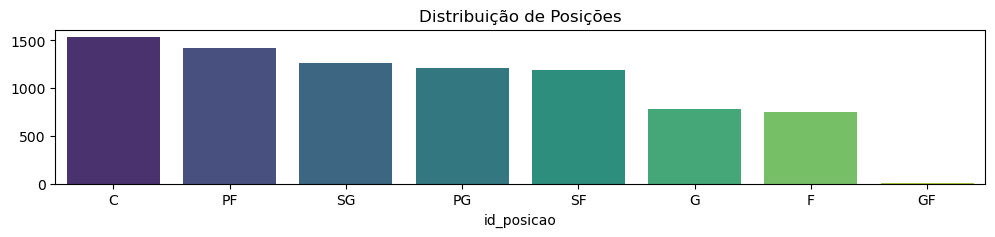

In [148]:
plt.figure(figsize=(12, 2))
sns.barplot(x=nba.id_posicao.value_counts().index, 
            y=nba.id_posicao.value_counts().values, 
            palette='viridis')
plt.title("Distribuição de Posições")
plt.show()

#### Select KBest - selecao das melhores features via f_classif que usa ANOVA F-Score

In [149]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import LabelEncoder

In [3]:
#df_nba.to_csv('dataset_ml_completo__fe__05122024.csv')
df_final_ = pd.read_csv('dataset_ml_completo__fe__05122024.csv')

In [5]:
df_final_[:3]

,Unnamed: 0,id_jogador,id_posicao,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,ranking_salario,idade,idade_na_temporada,idade_completa,salario_,altura,peso,taxa_faltas,proporcao_faltas,rebotes_por_minuto,tocos_roubos_por_minuto,impacto_defensivo,pontos_por_minuto,eficiencia_3pontos,eficiencia_lances_livres,contribuicao_ofensiva,prop_tentativas_3pontos,prop_lances_livres,taxa_erros_assistencias
0,0,366,SG,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,15,49,1,23,9000000.0,2.03,102.322075,0.369347,0.0,0.118593,0.058794,0.122111,0.645226,35.217758,557.028762,0.757286,0.188447,0.277259,0.748879
1,1,366,SG,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,27,49,1,24,10125000.0,2.03,101.694366,1.022082,0.0,0.093586,0.052226,0.095338,0.697161,43.355229,450.145440,0.812128,0.150606,0.222222,0.701219
2,2,366,SG,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,17,49,1,25,11250000.0,2.03,102.576622,1.332326,0.0,0.091641,0.066465,0.098355,0.740853,44.205102,670.385223,0.849950,0.168781,0.265066,0.729231


In [6]:
nba_clf = df_final_.copy()

#### LABEL ENCODER

In [7]:
from sklearn.preprocessing import LabelEncoder

# Crie o encoder
label_encoder = LabelEncoder()

# Aplique o Label Encoder na coluna 'id_posicao'
nba_clf['id_posicao_encoded'] = label_encoder.fit_transform(nba_clf['id_posicao'])

# Verifique a correspondência entre os rótulos e os números
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapeamento de Labels:", label_mapping)

Mapeamento de Labels: {'C': 0, 'F': 1, 'G': 2, 'GF': 3, 'PF': 4, 'PG': 5, 'SF': 6, 'SG': 7}


<h4>Select KBest</h4> <p><b>f-classif</b> é uma métrica de scorificação por ANOVA, quando medimos a relação entre a variância entre os grupos e a variância dentro dos grupos, no contexto de classificação.</p>
<ul>
<li><b>Interpretação prática:</b> Features com um F-score maior são mais relevantes para prever o valor da variável alvo, com base no critério de separação das classes.</li>
<li><b>Valores baixos:</b> Um F-score baixo indica que a feature tem pouca ou nenhuma relação com a variável alvo e provavelmente não contribui muito para a classificação.</li>
    
</ul>

<b>Por que usar ANOVA F-score (f_classif)?</b>
<ul><li>ANOVA é apropriado para problemas de classificação, especialmente quando a variável alvo é categórica (como no caso de classificação multiclasse).</li>
<li>Ele avalia a relevância de cada feature independentemente, identificando aquelas que têm maior impacto estatístico na separação das classes.</li>
</ul>

#### Explicativas X e a outcome y_hat(multiclasses)

In [155]:
#nba_clf = nba_clf.drop_duplicates(subset='id_jogador')

In [156]:
nba_clf

,Unnamed: 0,id_jogador,id_posicao,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,ranking_salario,idade,idade_na_temporada,idade_completa,salario_,altura,peso,taxa_faltas,proporcao_faltas,rebotes_por_minuto,tocos_roubos_por_minuto,impacto_defensivo,pontos_por_minuto,eficiencia_3pontos,eficiencia_lances_livres,contribuicao_ofensiva,prop_tentativas_3pontos,prop_lances_livres,taxa_erros_assistencias,id_posicao_encoded
0,0,366,SG,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,15,49,1,23,9000000.0,2.03,102.322075,0.369347,0.0,0.118593,0.058794,0.122111,0.645226,35.217758,557.028762,0.757286,0.188447,0.277259,0.748879,7
1,1,366,SG,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,27,49,1,24,10125000.0,2.03,101.694366,1.022082,0.0,0.093586,0.052226,0.095338,0.697161,43.355229,450.145440,0.812128,0.150606,0.222222,0.701219,7
2,2,366,SG,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,17,49,1,25,11250000.0,2.03,102.576622,1.332326,0.0,0.091641,0.066465,0.098355,0.740853,44.205102,670.385223,0.849950,0.168781,0.265066,0.729231,7
3,3,366,SG,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,14,49,1,26,12375000.0,2.03,101.864983,0.700229,0.0,0.102593,0.069031,0.107551,0.718154,37.835820,642.809559,0.844394,0.160575,0.252257,0.716012,7
4,4,366,SG,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,11,49,1,27,13500000.0,2.03,102.447159,0.513056,0.0,0.098709,0.068293,0.102439,0.649067,28.398937,538.344147,0.779340,0.156186,0.251989,0.629956,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,8157,4576087,F,23.0,8.086957,0.608696,0.0,0.0,0.0,0.0,0.0,186.0,37.0,14.0,1.608696,3.260870,1.260870,2.565218,49.153000,0.260870,0.608696,42.857143,0.478261,0.869565,55.000000,0.478261,0.347826,75.0,29.0,59.0,6.0,14.0,11.0,20.0,11.0,8.0,0.086957,0.478261,2.0,11.0,277,22,1,20,2303520.0,2.03,90.720000,0.000000,0.0,0.198925,0.069892,0.258065,0.403226,11.180124,26.304348,0.462366,0.237288,0.146667,0.727272,1
8158,8158,4687718,F,15.0,6.400000,0.666667,0.0,0.0,0.0,1.0,0.0,96.0,25.0,10.0,1.666667,3.066667,1.200000,2.400000,50.000000,0.133333,0.400000,33.333334,0.533333,0.533333,100.000000,0.333333,0.200000,46.0,18.0,36.0,2.0,6.0,8.0,8.0,5.0,3.0,0.266667,0.400000,4.0,6.0,332,22,1,20,171

In [157]:
X = nba_clf.drop(columns=['id_posicao_encoded', 'id_posicao', 'idade', 'idade_na_temporada','idade_completa'])
y = nba_clf['id_posicao_encoded']

In [158]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<p><b>MinMaxScaler:</b> Escala os dados para que fiquem entre um intervalo definido, geralmente [0, 1]. (geralmente usada para distribuicões que não seguem uma normal)</p>
<p><b>standardScaler:</b> Transforma os dados para que tenham média 0 e desvio padrão 1. (distribuição normalizada ou proxima disso)</p>
<p><b>Normalize:</b> Transforma os dados de forma que cada linha tenha uma norma unitária.</p>

In [162]:
# Aplicar o SelectKBest com ANOVA F-score
k = 15 # Número de melhores features
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

In [163]:
# Recuperar os nomes das melhores features
scores = selector.scores_
selected_features = X.columns[selector.get_support()].tolist()
print("Melhores features selecionadas:", selected_features)

Melhores features selecionadas: ['media_rebotes', 'media_cestas_3pontos', 'media_tentativas_3pontos', 'pct_3pontos', 'media_assistencias', 'tentativas_3pontos', 'assistencias', 'media_tocos', 'tocos', 'altura', 'peso', 'rebotes_por_minuto', 'impacto_defensivo', 'eficiencia_3pontos', 'prop_tentativas_3pontos']


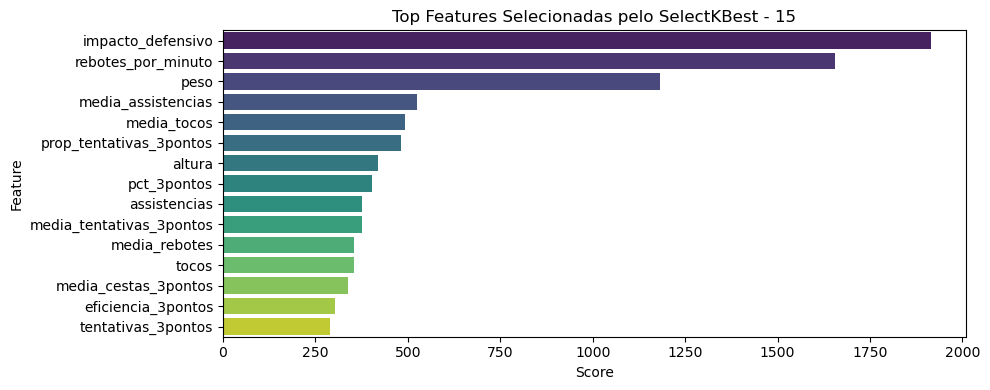

In [164]:
# Criar um DataFrame para visualização
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
}).sort_values(by='Score', ascending=False)

# Plotar os scores
plt.figure(figsize=(10, 4))
sns.barplot(x='Score', y='Feature', data=scores_df.head(k), palette='viridis')
plt.title(f'Top Features Selecionadas pelo SelectKBest - {k}')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [165]:
# observacao logo abaixo sobre forca linear (correlacao) e poder preditivo

#### Evaluate de verificacao da forca linear entre as features

In [166]:
selected_features.append('id_posicao_encoded')

In [167]:
nba_clf__ =  nba_clf.copy()

In [168]:
nba_clf__ = nba_clf__.drop(columns=['id_posicao', 'Unnamed: 0'])
corr_matrix = nba_clf.loc[:, selected_features].corr()

In [169]:
corr_matrix['id_posicao_encoded'].sort_values(ascending=False)

id_posicao_encoded          1.000000
prop_tentativas_3pontos     0.410630
media_tentativas_3pontos    0.405695
pct_3pontos                 0.395999
media_cestas_3pontos        0.391183
tentativas_3pontos          0.375858
eficiencia_3pontos          0.373895
media_assistencias          0.254770
assistencias                0.230129
media_rebotes              -0.291466
tocos                      -0.339310
altura                     -0.353642
media_tocos                -0.389356
peso                       -0.488701
rebotes_por_minuto         -0.534158
impacto_defensivo          -0.560503
Name: id_posicao_encoded, dtype: float64

#### Visualização Histograma

<Figure size 1400x700 with 0 Axes>

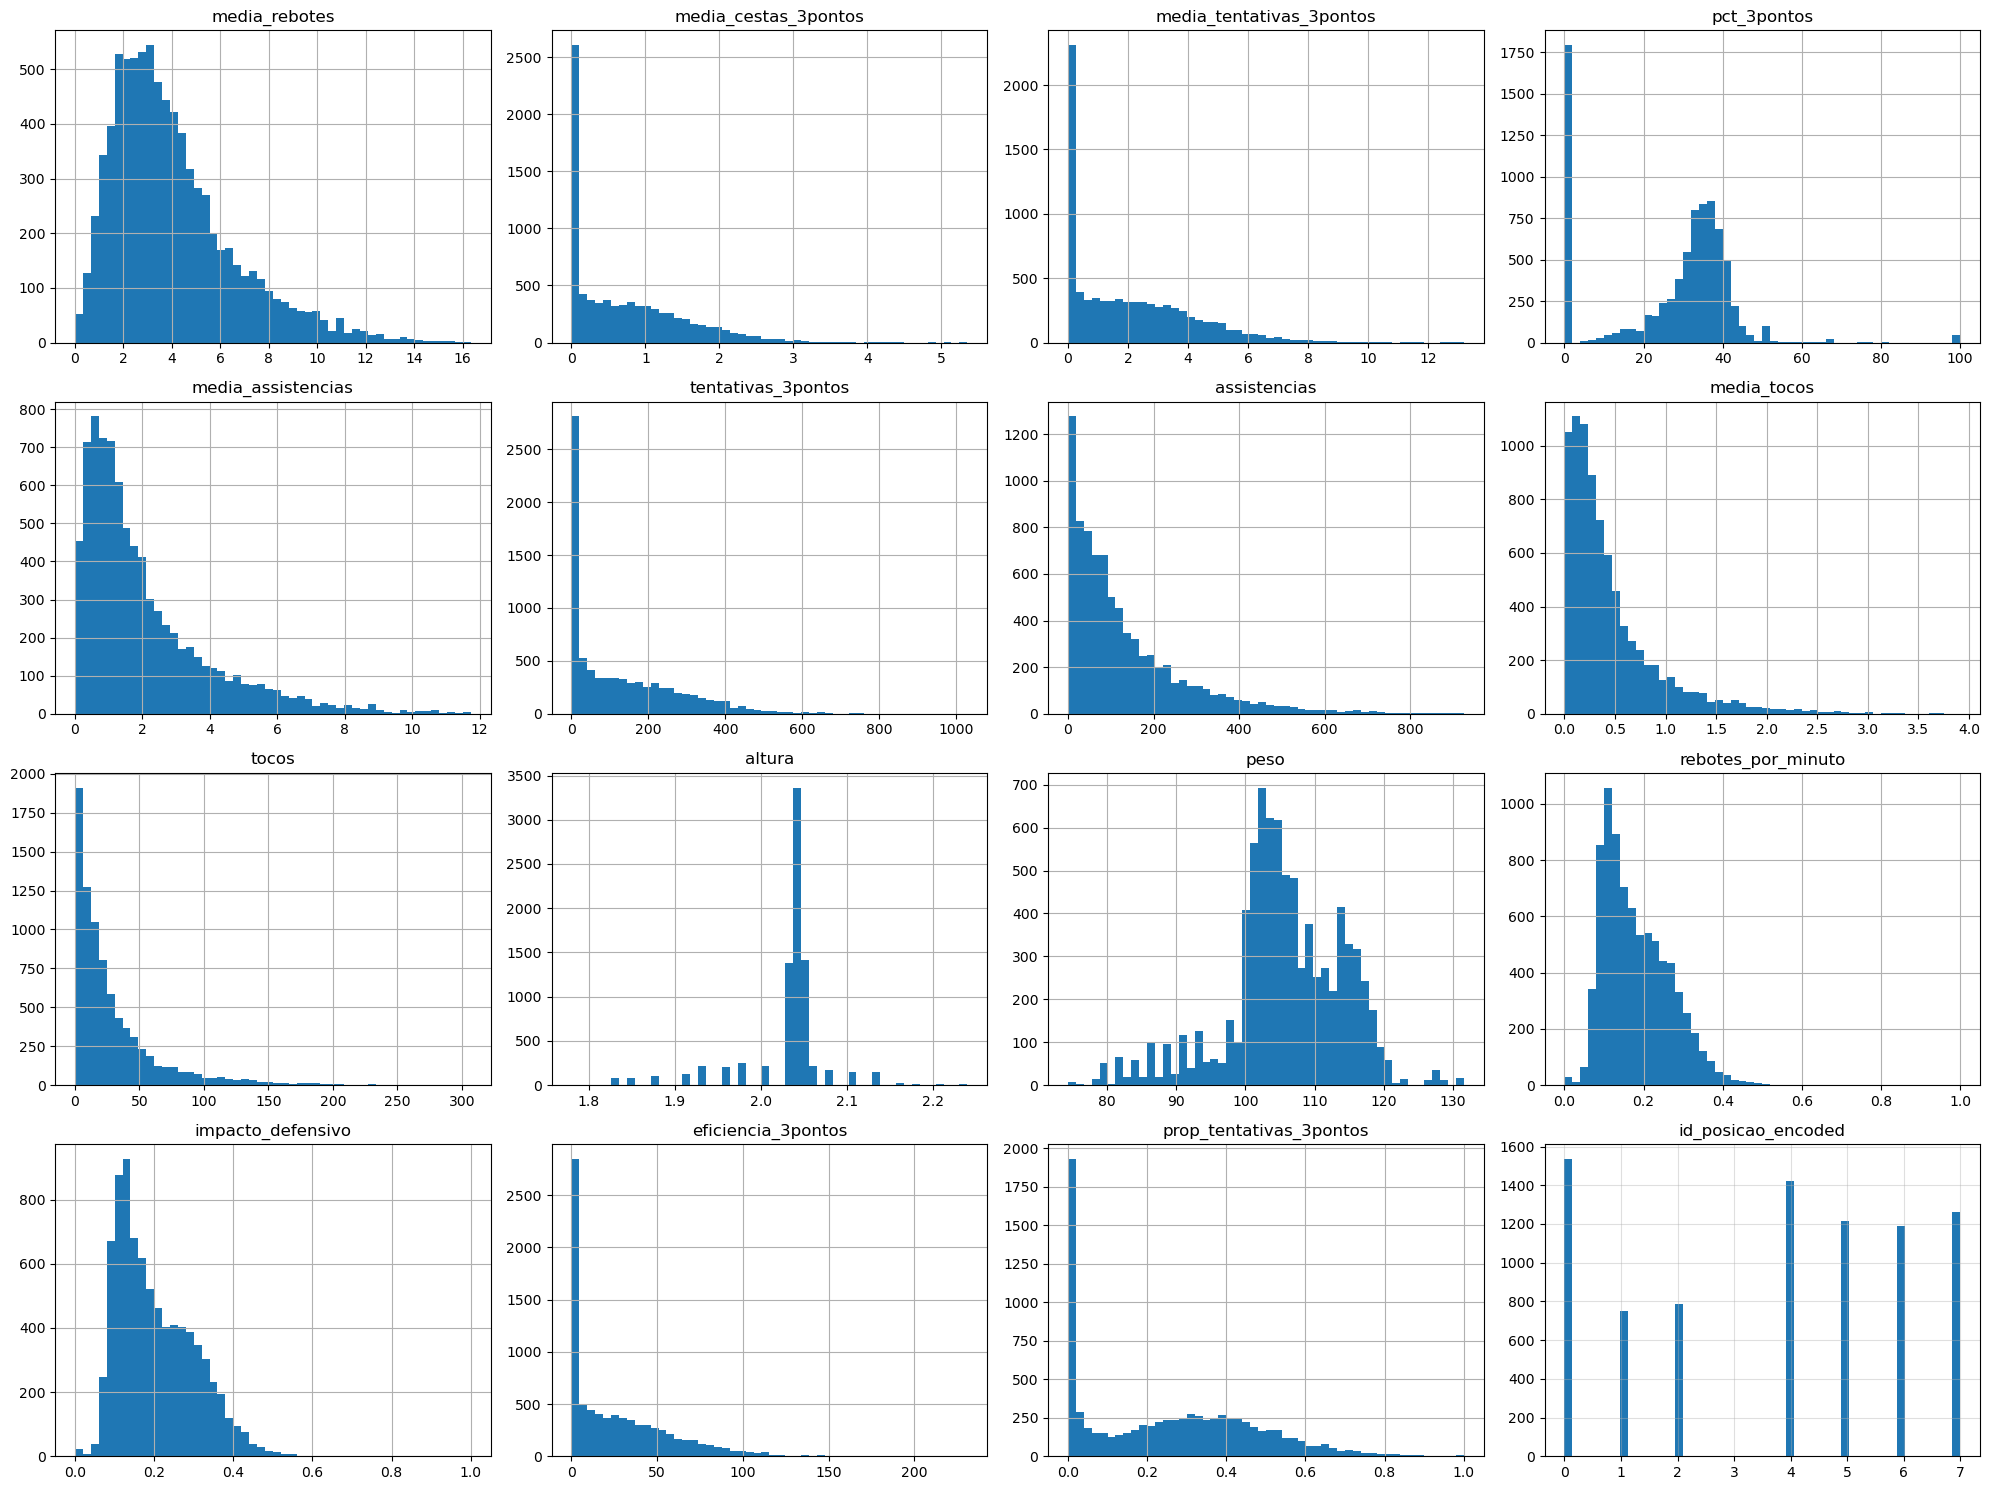

In [170]:
plt.figure(figsize=(14, 7))
nba_clf.loc[:, selected_features].hist(bins=50, figsize=(20,15), grid=True)
plt.tight_layout()
plt.grid(alpha=.4)
plt.show()

### GRIDSEARCH e teste nas técnicas OvO e OvA

<p>OvO usado quando temos um numero razoavel de classes, mas um dataset pequeno. O(n_classes^2) complexity <br>
<a href="https://scikit-learn.org/dev/modules/generated/sklearn.multiclass.OneVsOneClassifier.html">https://scikit-learn.org/dev/modules/generated/sklearn.multiclass.OneVsOneClassifier.html</a></p>
<p>OvA é mais indicado para poucas classes e datasets maiores.<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html</a></p>

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize 
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

X = nba_clf__.drop(columns=['id_posicao_encoded', 'id_jogador'], axis=1)
y = nba_clf__['id_posicao_encoded']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [174]:
pipelines = {
    'rf': Pipeline([
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    # OvO
    'lr_ovo': Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)))
    ]),
    # OvO
    'svm_ovo': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', OneVsOneClassifier(SVC(kernel='rbf', probability=True, random_state=42)))
    ]),
     # OvA
    'lr_ova': Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)))
    ]),
    # OvA
    'svm_ova': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42)))
    ]),
    'xgboost': Pipeline([
        ('classifier', XGBClassifier(objective='multi:softmax', use_label_encoder=False, random_state=42))
    ]),
    'dt': Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])
}

In [175]:
# Dicts ParamGrids
param_grid = { 
    'rf' : {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
    },

    'lr_ovo' : {
        'classifier__estimator__C': [0.1, 1, 10, 100],
        'classifier__estimator__solver': ['lbfgs', 'newton-cg'],
        'classifier__estimator__max_iter': [500, 1000, 2000],
        'classifier__estimator__penalty' : ['l2']
    },
    
    'svm_ovo' : {
        'classifier__estimator__C': [0.1, 1, 10],
        'classifier__estimator__kernel': ['rbf', 'poly'],
        'classifier__estimator__gamma': ['scale', 'auto']
    },

    'lr_ova' : {
        'classifier__estimator__C': [0.1, 1, 10, 100],
        'classifier__estimator__solver': ['lbfgs', 'newton-cg'],
        'classifier__estimator__max_iter': [500, 1000, 2000],
        'classifier__estimator__penalty' : ['l2']
    },
    
    'svm_ova' : {
        'classifier__estimator__C': [0.1, 1, 10],
        'classifier__estimator__kernel': ['rbf', 'poly'],
        'classifier__estimator__gamma': ['scale', 'auto']
    },
    
    'xgboost' : {
        'classifier__n_estimators': [100, 200, 300, 500],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__subsample': [0.5, 0.7],
        'classifier__colsample_bytree': [0.5, 0.7]
    },
    
   'dt': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
}

#### GridSearchs Dinamicos

In [176]:
# Realizar o GridSearchCV para cada pipeline
best_models = {}
for name, pipeline in pipelines.items():
    print(f"Rodando GridSearchCV para {name}...")
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Melhor modelo para {name}: {grid_search.best_params_}")
    print(f"Melhor Acurácia para {name}: {grid_search.best_score_}")

Rodando GridSearchCV para rf...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhor modelo para rf: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Melhor Acurácia para rf: 0.6120366360974694
Rodando GridSearchCV para lr_ovo...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhor modelo para lr_ovo: {'classifier__estimator__C': 100, 'classifier__estimator__max_iter': 500, 'classifier__estimator__penalty': 'l2', 'classifier__estimator__solver': 'newton-cg'}
Melhor Acurácia para lr_ovo: 0.5466392071957896
Rodando GridSearchCV para svm_ovo...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhor modelo para svm_ovo: {'classifier__estimator__C': 10, 'classifier__estimator__gamma': 'scale', 'classifier__estimator__kernel': 'rbf'}
Melhor Acurácia para svm_ovo: 0.6100478193777026
Rodando GridSearchCV para lr_ova...
Fitting 5 folds for each of 24 candidates, to

#### Matriz de Confusao & Relatório de Classificação

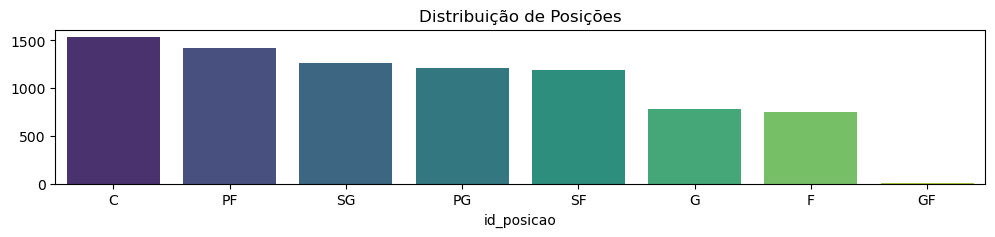

In [134]:
plt.figure(figsize=(12, 2))
sns.barplot(x=nba_clf.id_posicao.value_counts().index, 
            y=nba_clf.id_posicao.value_counts().values, 
            palette='viridis')
plt.title("Distribuição de Posições")
plt.show()

In [135]:
labels = list(label_mapping.keys())

In [136]:
# tirando a posicao GF JA QUE NAO ENTRA NO SETTEST
#labels.pop(3) # retirando a classe GF


Modelo: rf
Acurácia: 0.6246172688303735
Relatório de Classificação:


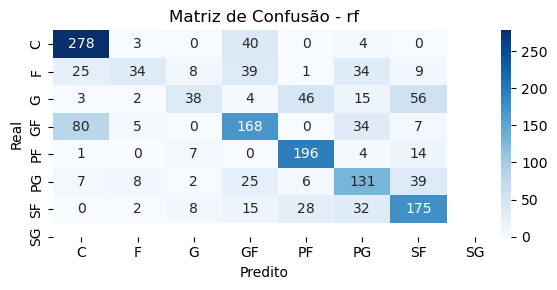

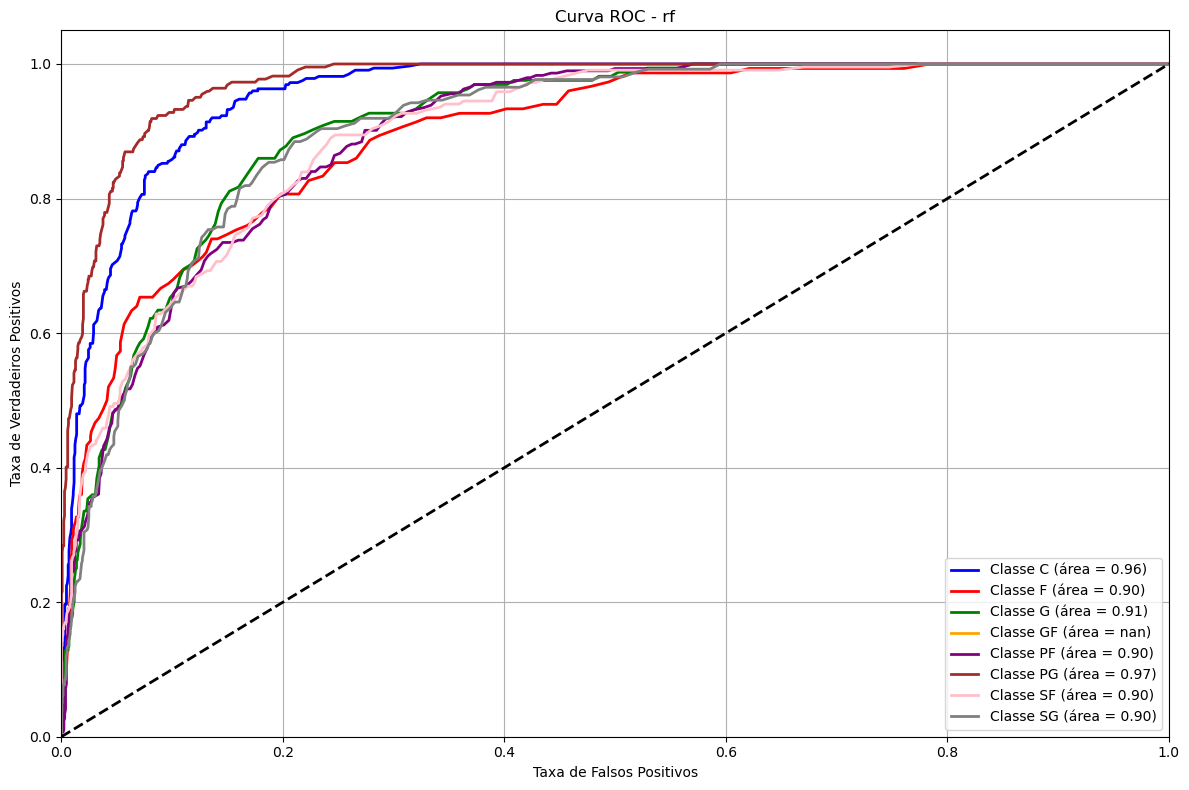


Modelo: lr_ovo
Acurácia: 0.5517452541334966
Relatório de Classificação:


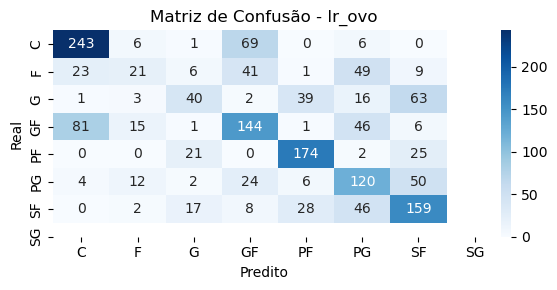

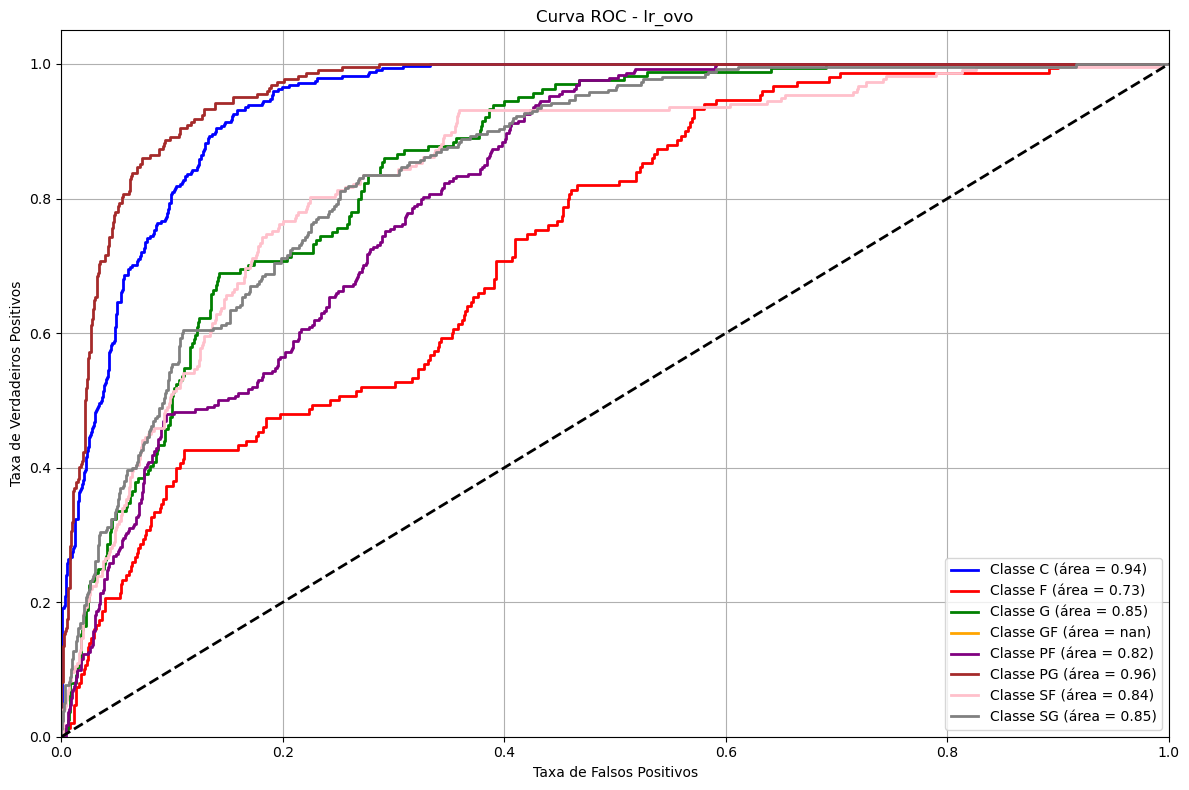


Modelo: svm_ovo
Acurácia: 0.6203306797305572
Relatório de Classificação:


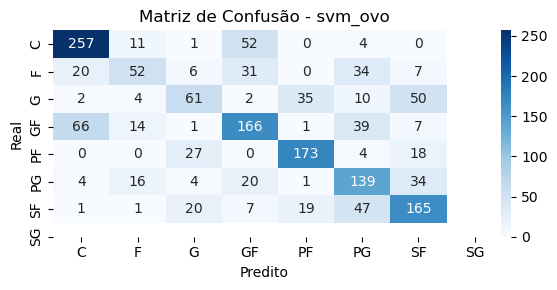

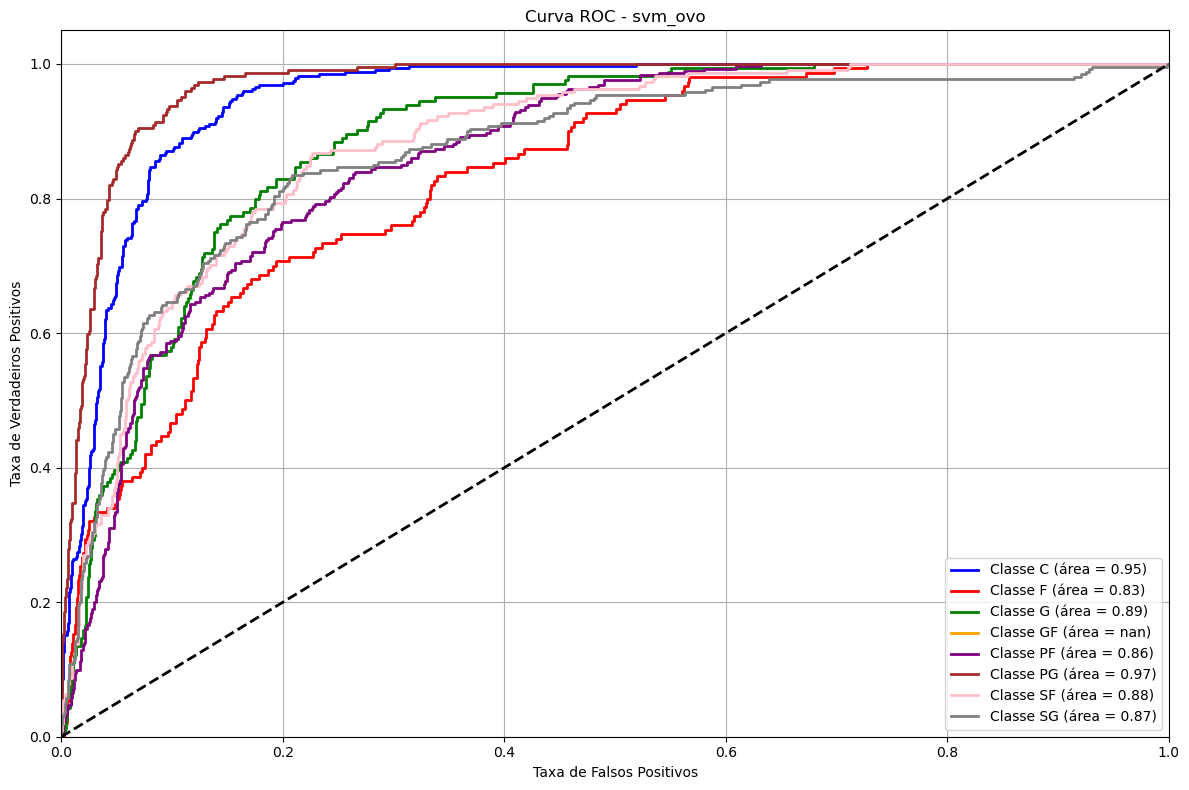


Modelo: lr_ova
Acurácia: 0.5217391304347826
Relatório de Classificação:


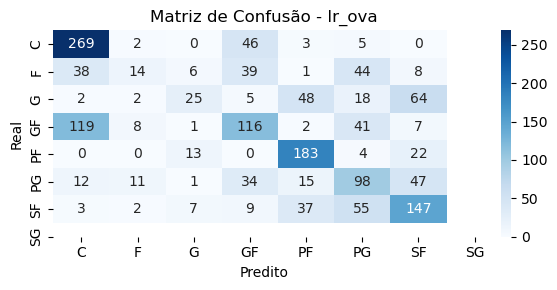

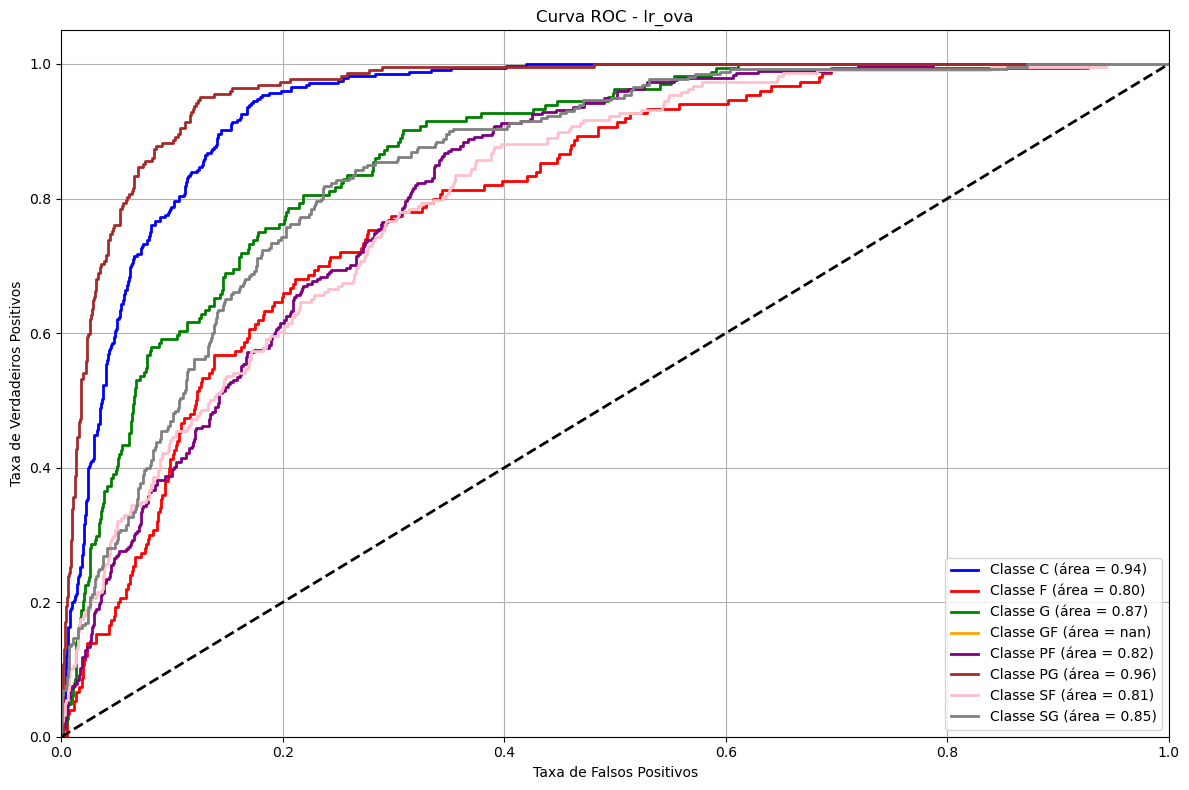


Modelo: svm_ova
Acurácia: 0.6233925290875689
Relatório de Classificação:


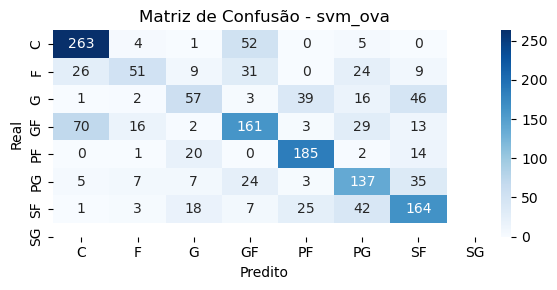

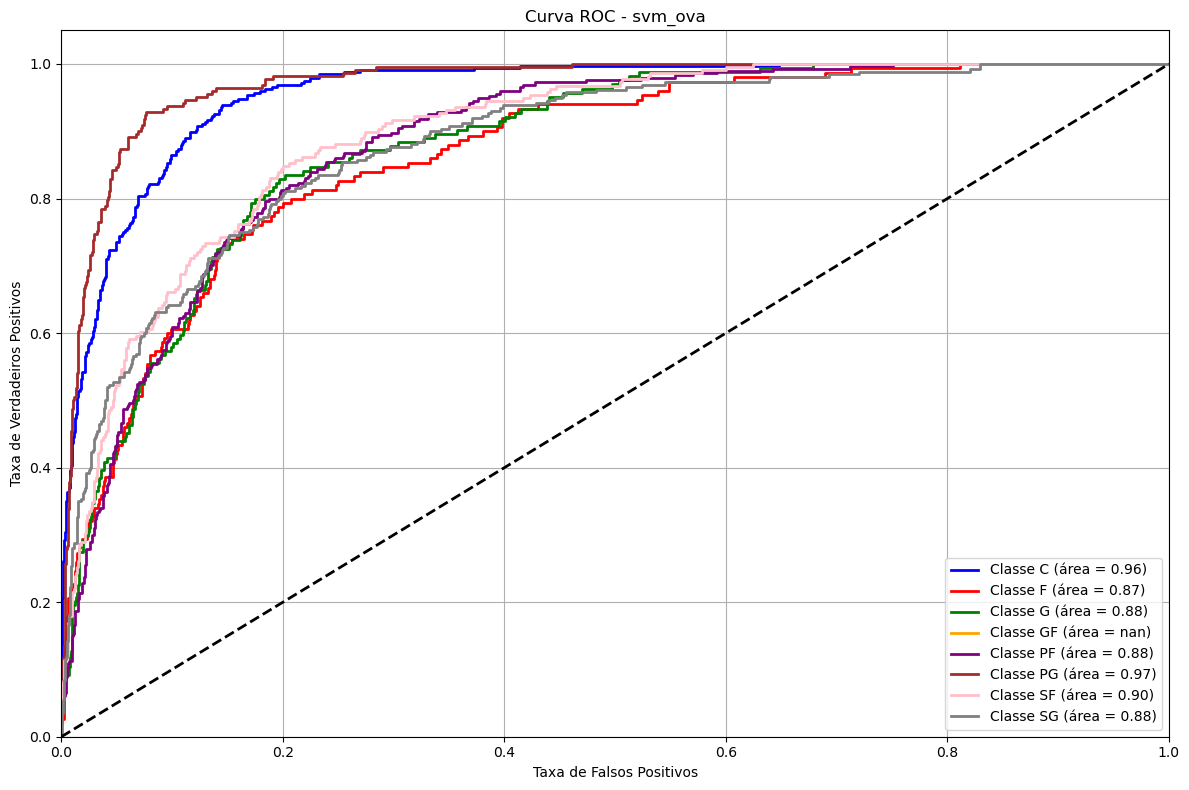


Modelo: xgboost
Acurácia: 0.5303123086344151
Relatório de Classificação:


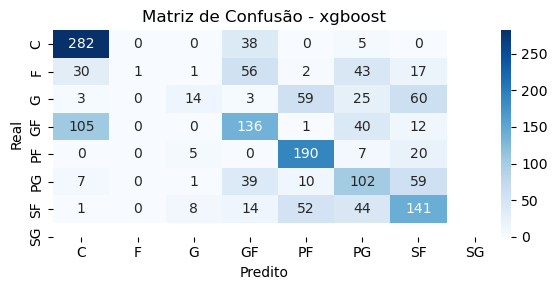

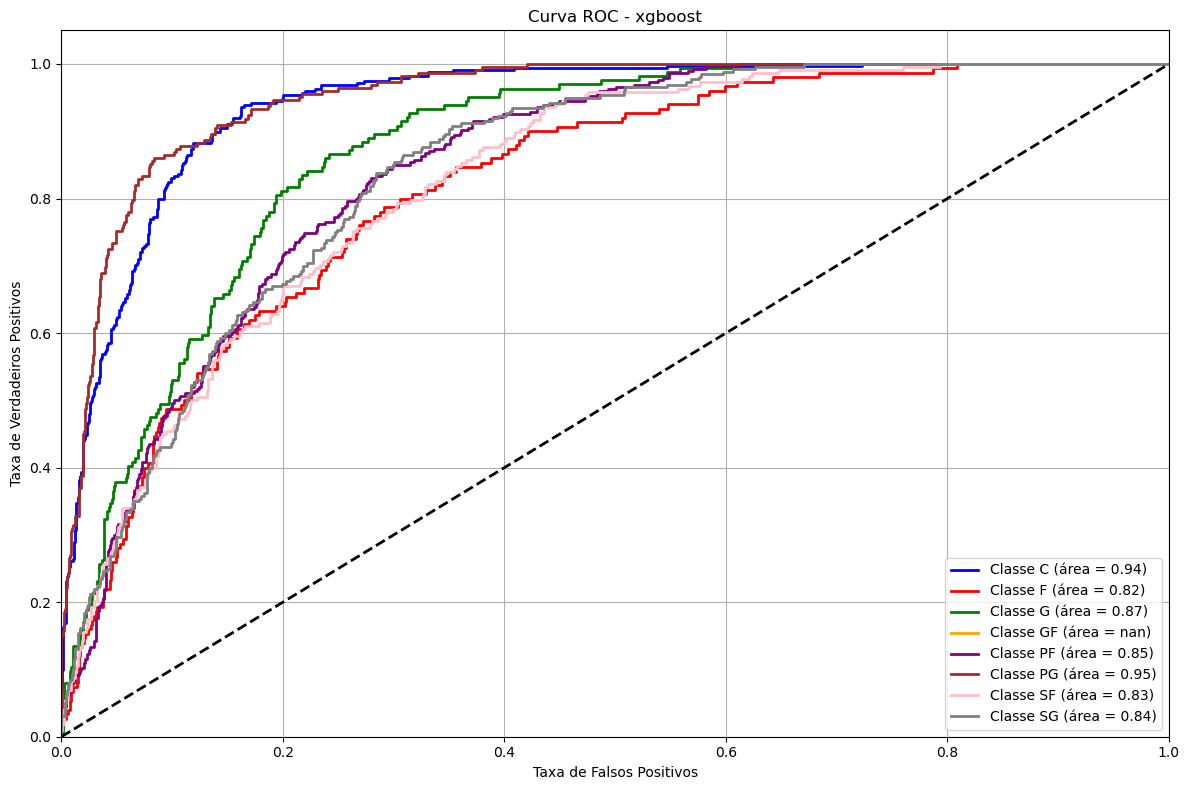


Modelo: dt
Acurácia: 0.5211267605633803
Relatório de Classificação:


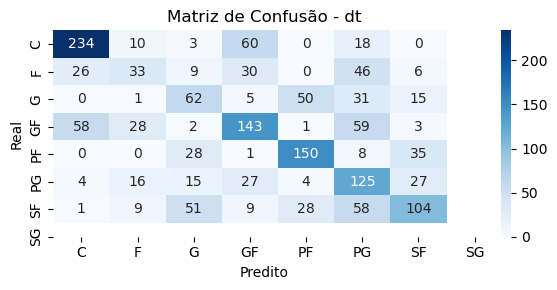

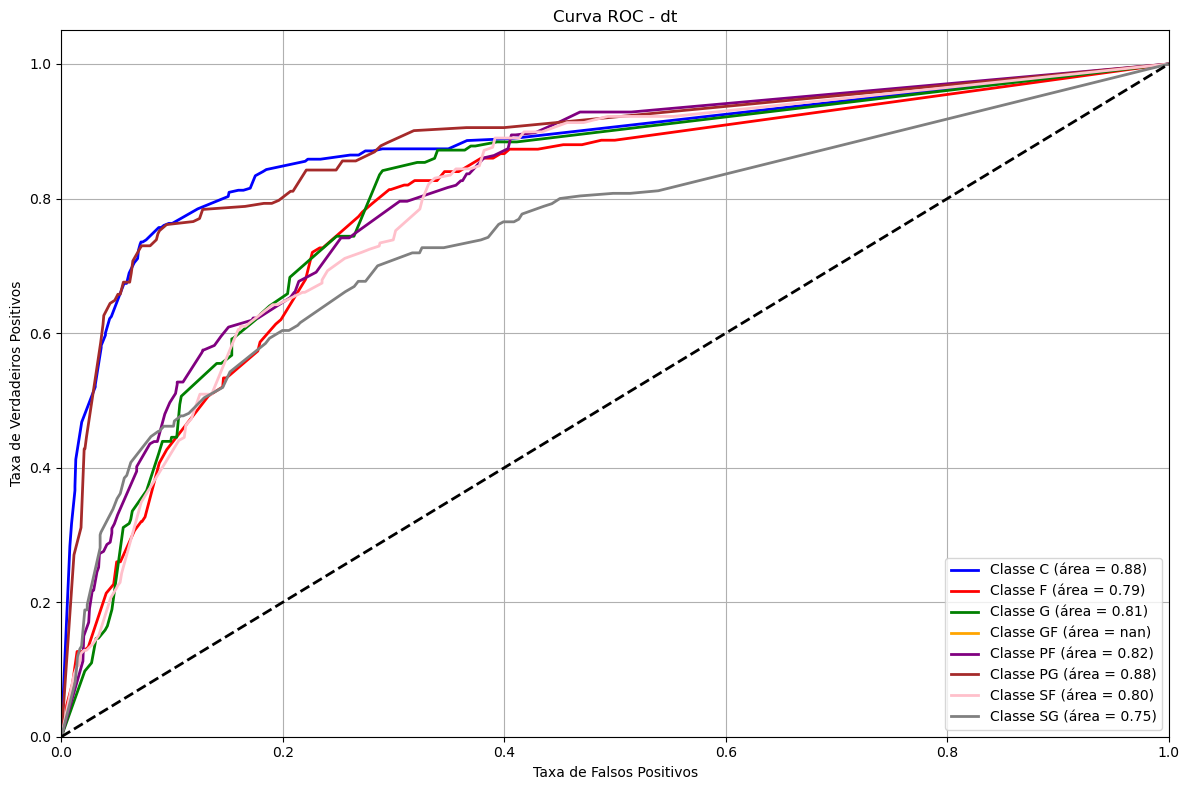

In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Exibir os resultados do melhor modelo
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

X_scaled_train = ss_scaler.fit_transform(X_train)
X_scaled_test = ss_scaler.fit_transform(X_test)

for model_name, model in best_models.items():
    print(f"\nModelo: {model_name}")
    model.fit(X_scaled_train, y_train)
    y_pred = model.predict(X_scaled_test)
    
    # Calcular métricas de classificação com classification_report
    accuracy = accuracy_score(y_test, y_pred)
    
    try:
        class_report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
    except:
        pass
        
    print(f"Acurácia: {accuracy}")
    print("Relatório de Classificação:")
    try:
        print(classification_report(y_test, y_pred, target_names=labels))
    except:
        pass

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(6, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    # Calcular e plotar a Curva ROC
    y_test_bin = label_binarize(y_test, classes=list(label_mapping.values()))
    y_score = model.predict_proba(X_scaled_test) if hasattr(model, "predict_proba") else model.decision_function(X_scaled_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(len(labels)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotar a ROC para cada classe
    plt.figure(figsize=(12, 8))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray'])
    for i, color in zip(range(len(labels)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Classe {labels[i]} (área = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Learning Curves


Rodando curva de aprendizado para rf...


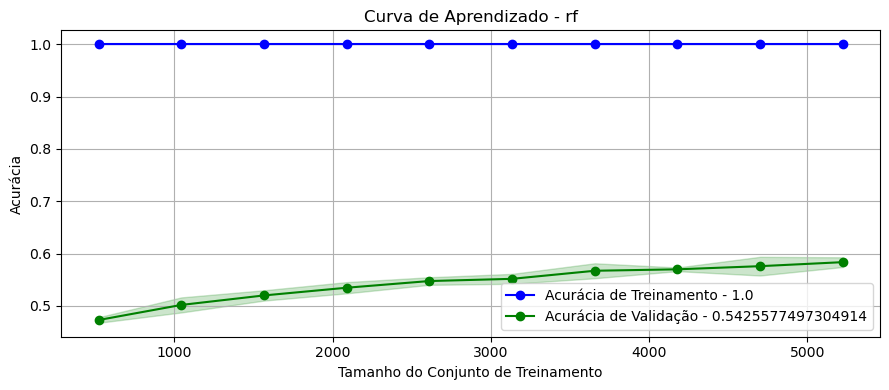


Rodando curva de aprendizado para lr_ovo...


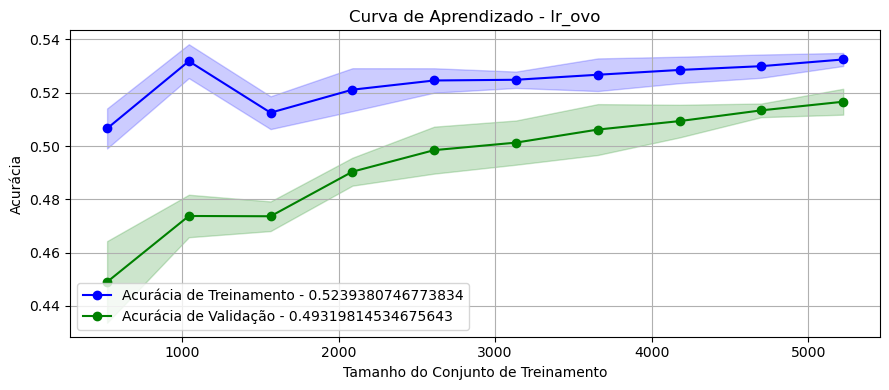


Rodando curva de aprendizado para svm_ovo...


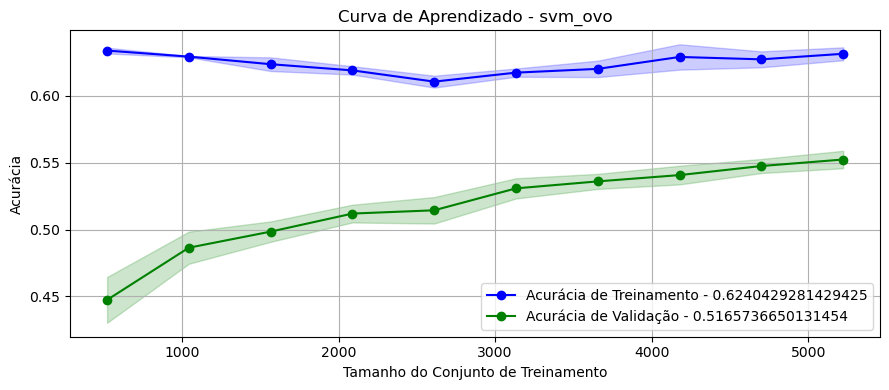


Rodando curva de aprendizado para lr_ova...


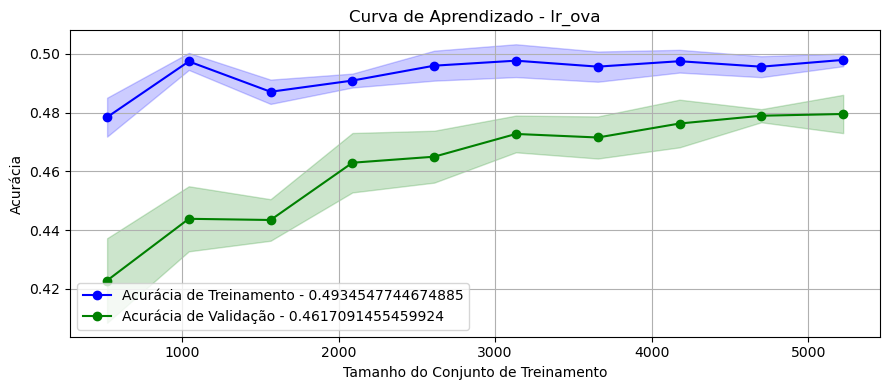


Rodando curva de aprendizado para svm_ova...


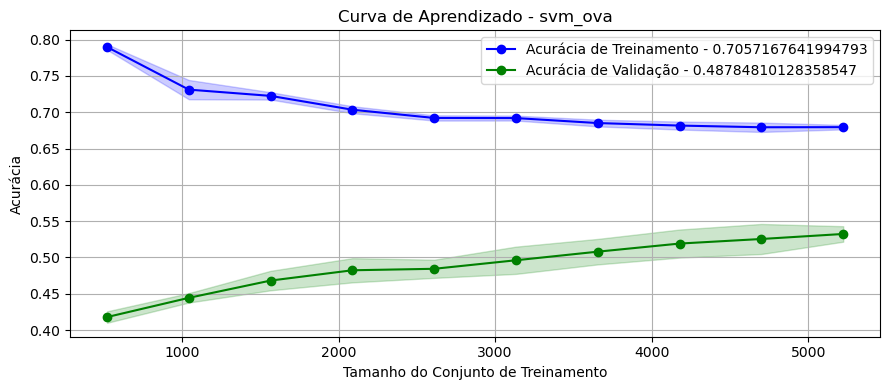


Rodando curva de aprendizado para xgboost...


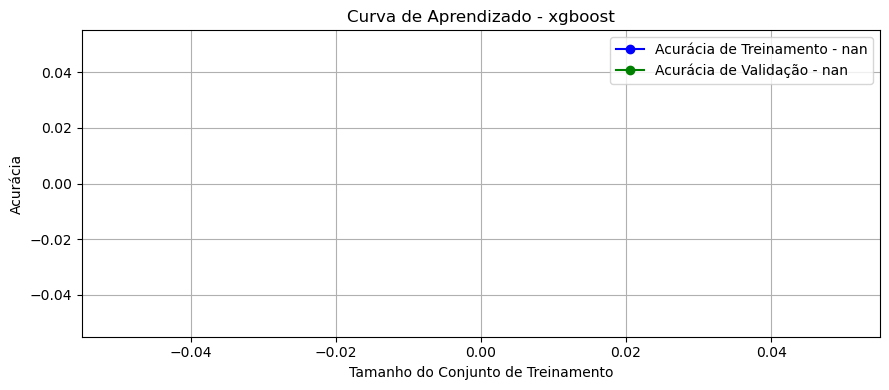


Rodando curva de aprendizado para dt...


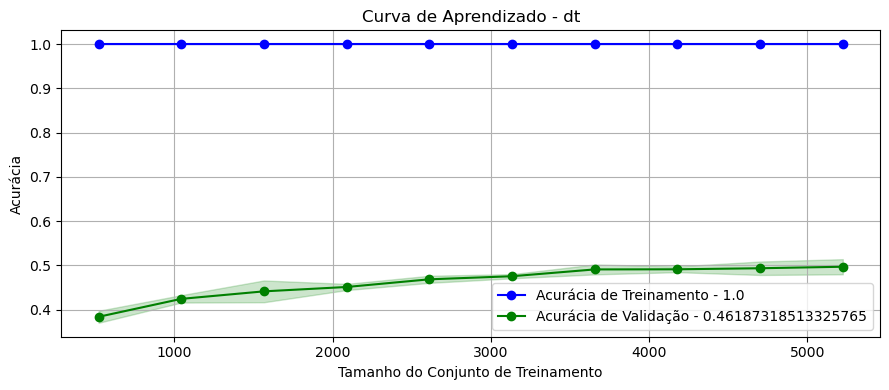

In [141]:
# Rodar aprendizado em lote para cada pipeline
for name, pipeline in pipelines.items():
    print(f"\nRodando curva de aprendizado para {name}...")

    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=pipeline,
        X=X_scaled_train,
        y=y_train,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        train_sizes=train_sizes,
    )   
    
    # Calcular a média e desvio padrão das métricas
    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    mean_test_scores = np.mean(test_scores, axis=1)
    std_test_scores = np.std(test_scores, axis=1)
    
    # Plotar a curva de aprendizado
    plt.figure(figsize=(9, 4))
    
    # Curva de treino
    plt.plot(train_sizes, mean_train_scores, 'o-', label=f'Acurácia de Treinamento - {np.mean(mean_train_scores)}', color='blue')
    plt.fill_between(train_sizes, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.2, color='blue')
    
    # Curva de validação
    plt.plot(train_sizes, mean_test_scores, 'o-', label=f'Acurácia de Validação - {np.mean(mean_test_scores)}', color='green')
    plt.fill_between(train_sizes, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.2, color='green')
    
    # Configuração do gráfico
    plt.title(f'Curva de Aprendizado - {name}')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Acurácia')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### Medidas de evaluate

In [ ]:
"""
{'f1_weighted', 'precision_weighted', 'jaccard_weighted', 'f1_macro', 'max_error', 'adjusted_mutual_info_score', 'mutual_info_score', 
'precision_micro', 'recall_macro', 'roc_auc_ovo', 'neg_root_mean_squared_error', 'adjusted_rand_score', 'jaccard_macro', 'f1_micro', 
'balanced_accuracy', 'accuracy', 'explained_variance', 'homogeneity_score', 'jaccard_samples', 'roc_auc', 'recall_samples', 
'neg_mean_squared_log_error', 'precision_samples', 'v_measure_score', 'neg_log_loss', 'recall_weighted', 'neg_brier_score', 
'rand_score', 'roc_auc_ovo_weighted', 'neg_root_mean_squared_log_error', 'completeness_score', 'top_k_accuracy', 'roc_auc_ovr_weighted', 
'average_precision', 'fowlkes_mallows_score', 'jaccard', 'neg_mean_absolute_percentage_error', 'positive_likelihood_ratio', 'recall', 
'neg_mean_poisson_deviance', 'recall_micro', 'neg_mean_squared_error', 'neg_negative_likelihood_ratio', 'precision_macro', 'f1', 
'jaccard_micro', 'r2', 'matthews_corrcoef', 'f1_samples', 
'normalized_mutual_info_score', 'neg_mean_absolute_error', 'roc_auc_ovr', 'precision', 'neg_mean_gamma_deviance', 
'neg_median_absolute_error'}

"""